 # **Health AI Project 13: Fetal Health Dimensionality Reduction**

# **Group no.  13**

# *Gayathri Madala, Srivalli Kotichukkala, Goutham Mekala, Krishna Keshav, Jyothi Anvitha Ambati*

# **Summary**
--------------



**Project description**


1. Contextualization: Within the healthcare domain, the accurate assessment of fetal health is of paramount importance. This involves navigating through substantial datasets, and the optimization of these datasets plays a crucial role in enhancing the performance of predictive models. In this project, the primary focus is on utilizing Dimensionality Reduction (DR) techniques to streamline datasets, with the ultimate goal of improving the accuracy of predictive models for fetal health assessment.

2. Problem: Predictive modeling in fetal health encounters challenges due to the intricate nature of the datasets. Issues like high dimensionality, non-normal distribution, and the presence of outliers can impede the efficacy of machine learning models. A systematic approach is essential to address these challenges and elevate the accuracy of models critical for assessing fetal health.
3. Proposed approach: The project initiates with a meticulous analysis of the dataset, followed by rigorous data preprocessing. The confirmation of the absence of missing and duplicate values is coupled with addressing non-normal distribution through normalization via Min-Max scaling. Mitigating outliers using the Interquartile Range (IQR) capping method ensures the robustness of the dataset. Subsequent application of feature selection techniques, such as f_regression, L1 regularization, and Recursive Feature Elimination (RFE), aids in identifying the most relevant features. To further refine the dataset, feature extraction techniques like Linear Correlation Analysis (LCA) and Principal Component Analysis (PCA) are employed. The chosen models for assessment—Logistic Regression, Support Vector Machine (SVM), and Quadratic Discriminant Analysis—account for the reduced and optimized dataset.

4. Impact: Anticipated impacts of this approach include a marked improvement in the accuracy and efficiency of fetal health assessment models. Systematically addressing data quality, distribution, and dimensionality issues is expected to yield more reliable predictions. This has the potential to profoundly impact clinical decision-making, empowering healthcare practitioners with more informed choices and possibly leading to better outcomes for fetal health.


**Objective:**
The overarching objective of this project is to enhance the predictive capabilities of models assessing fetal health by leveraging advanced data preprocessing and dimensionality reduction techniques. The focal point is on optimizing information within the dataset, thereby improving the accuracy of models crucial for fetal health evaluation.


**Dataset:**
The dataset comprises 2126 records of fetal health data, each containing 29 features encompassing fetal heart rate (FHR), uterine contractions, and fetal movements. The target variable categorizes fetal health as normal, suspect, or pathological. After confirming no missing or duplicate values, the dataset's non-normal distribution is addressed through normalization, and outliers are handled via IQR capping. The dataset is then refined using feature selection and extraction techniques to create a more streamlined and informative dataset for modeling.



**Approach:**
The project employs a systematic approach, commencing with dataset analysis and preprocessing, followed by addressing non-normal distribution and outliers. Feature selection techniques, including f_regression, L1 regularization, and RFE, are employed. Feature extraction techniques, such as LCA and PCA, further refine the dataset. The final dataset is utilized with Logistic Regression, SVM, and Quadratic Discriminant Analysis models to assess fetal health.

**Conclusions:**
In conclusion, the proposed approach outlines a comprehensive methodology for optimizing fetal health datasets and enhancing the accuracy of predictive models. By systematically addressing issues related to data quality and dimensionality, the project aims to contribute to the development of more robust tools for fetal health assessment. The integration of advanced techniques in data preprocessing and dimensionality reduction establishes a foundation for enhanced predictive modeling in the healthcare domain.






# **I. Preparation**

# **Importing the necessary libraries and overview of the dataset**

In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

import scipy.stats as stats
from scipy.stats import iqr

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFECV

from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## **Connecting to Google account**

In [318]:
# Mount from google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Loading the data**
To load the dataset, we first upload the dataset to Google drive under Datasets folder in the drive. Dataset is loaded using read_csv() into a dataframe.

In [319]:
dataset_path = '/content/drive/MyDrive/Datasets/fetal_health_project.csv'
fetal_health_df = pd.read_csv(dataset_path)

### **Exploratory Data Analysis - Understand and connect with the Dataset**
At this point you need to gain a deep understanding of the data you're working with. Know the format, structure, shape and the type of information the data contains. Use pandas, matplotlib and numpy to interrogate and visualize the dataset to understand its shape, size, contents, distribution and any skewness of its contents,and to also get a feel for its cleanness, completeness, and any other issues.





Columns and their count of missing values:
Series([], dtype: int64)

Number of samples for each unique value:
1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


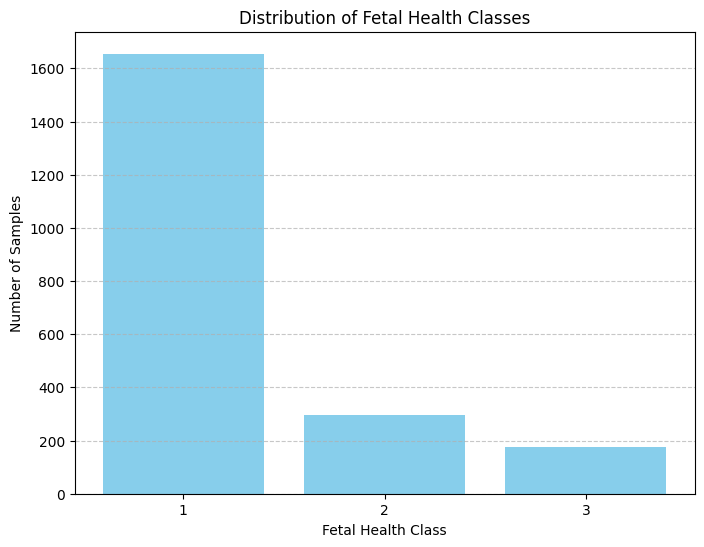


Basic Dataset Information:
Shape: (2126, 30)
Data Types:
[dtype('float64') dtype('int64')]


In [320]:
# Basic Dataset Information
shape = fetal_health_df.shape
data_types = fetal_health_df.dtypes

# Print columns and count of missing values
missing_values = fetal_health_df.isnull().sum()
print("Columns and their count of missing values:")
print(missing_values[missing_values > 0])  # Print only columns with missing values

#Target Variable
fetal_health_df["fetal_health"].describe()
value_counts = fetal_health_df["fetal_health"].value_counts().sort_index()

# Print the number of samples for each unique value
print("\nNumber of samples for each unique value:")
print(value_counts)

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel("Fetal Health Class")
plt.ylabel("Number of Samples")
plt.title("Distribution of Fetal Health Classes")
plt.xticks(value_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Statistical Summary
# statistical_summary = fetal_health_df.describe()

# Display the basic information and statistical summary
print("\nBasic Dataset Information:")
print("Shape:", shape)
print("Data Types:")
print(data_types.unique())


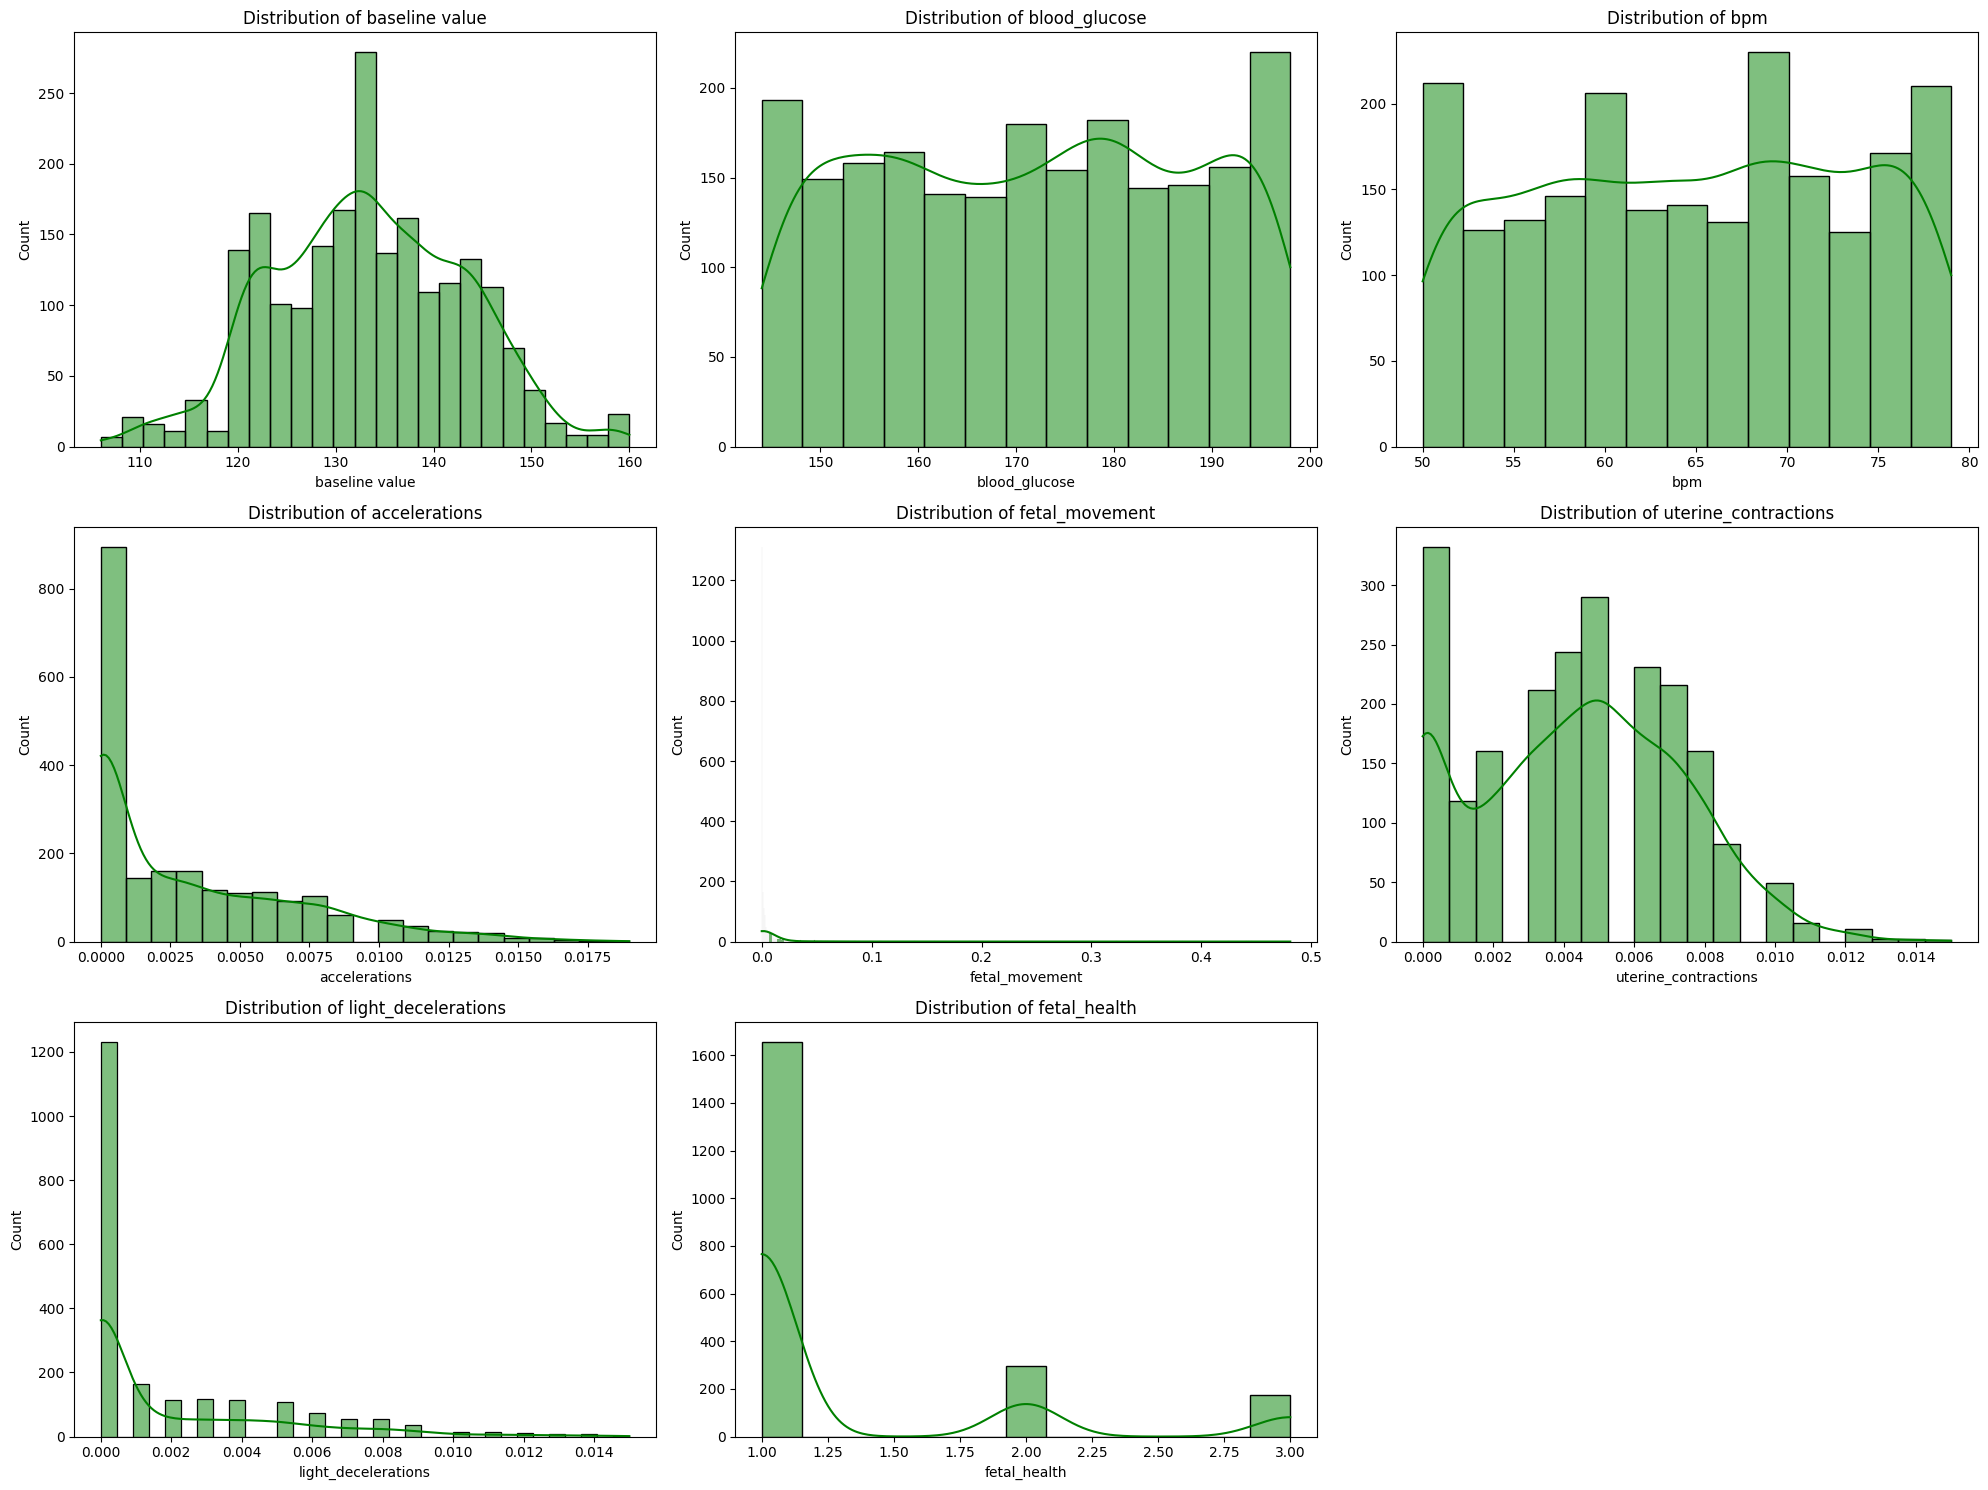

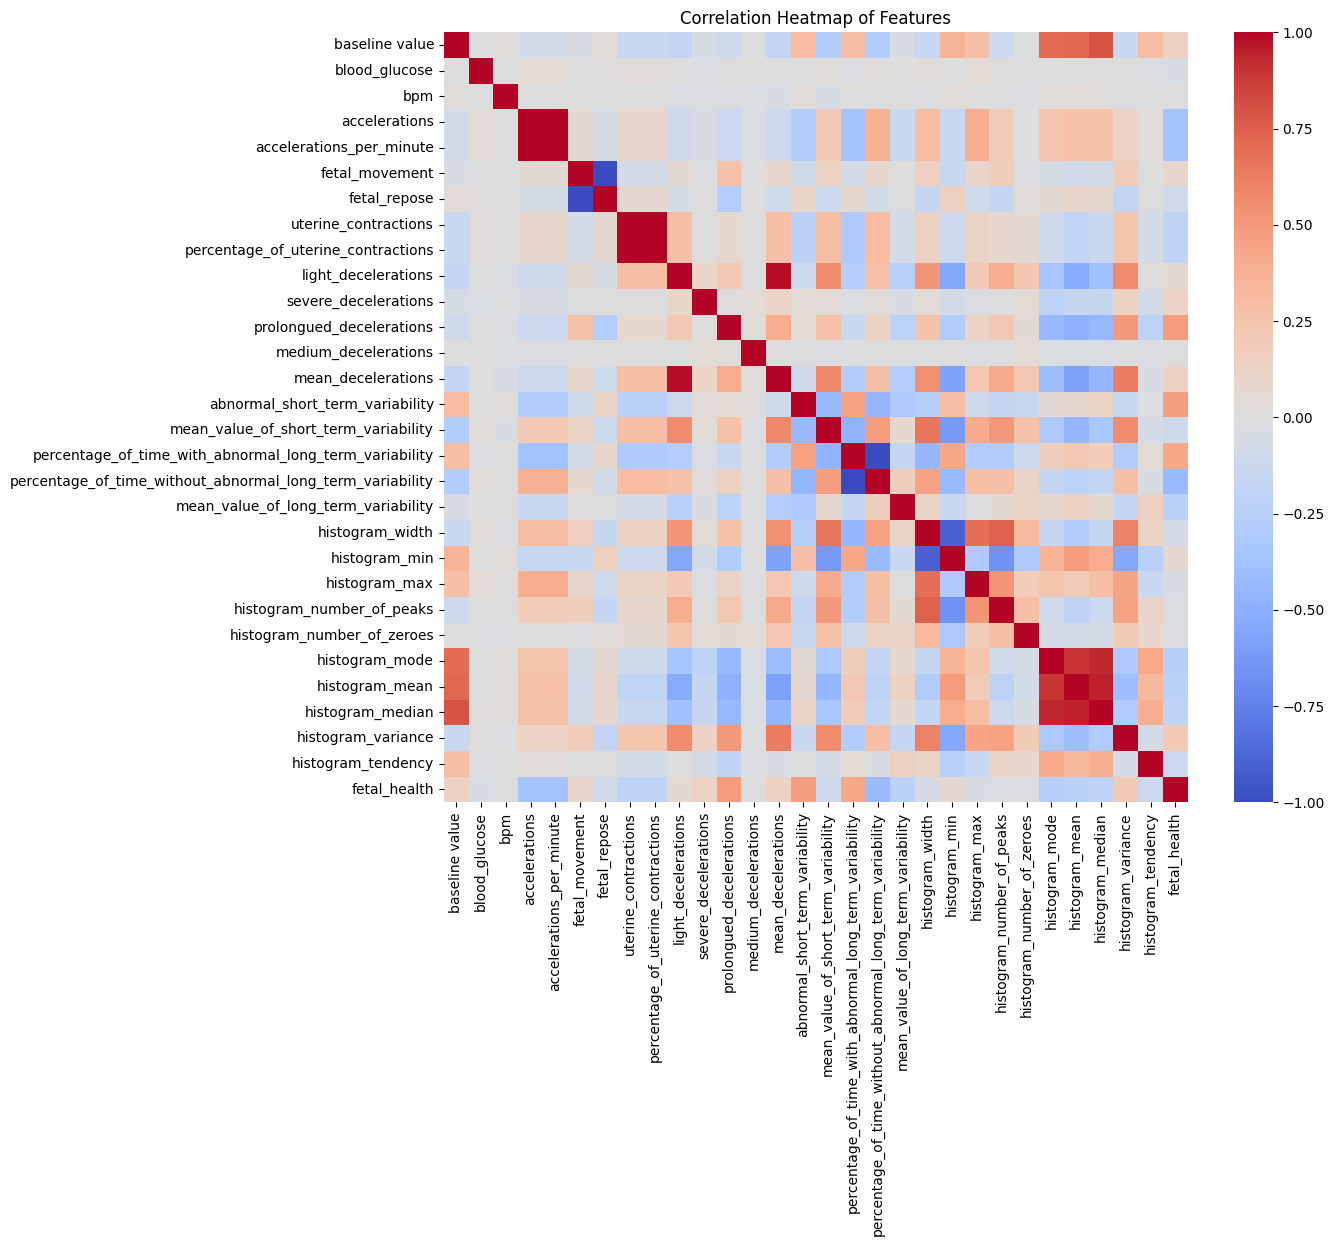

In [321]:
# Selecting a subset of features for visualization
selected_features = ['baseline value', 'blood_glucose', 'bpm', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'fetal_health']

# Plotting histograms for selected features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(selected_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(fetal_health_df[feature], kde=True, color="green")
    plt.title(f'Distribution of {feature}')
plt.tight_layout()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(fetal_health_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


### **OBSERVATIONS:**
- The dataset comprises 2126 observations and 30 features, indicating a moderately sized dataset for analysis.
- The dataset primarily contains numerical features of types float64 and int64.
- There are no missing values in the dataset, which is beneficial for model building as it reduces the need for imputation strategies and also no duplicates found among observations.
- The features exhibit varying distributions. Some, like 'baseline value' and 'blood_glucose', show a relatively normal distribution, while others display skewness.
- 'Accelerations' and 'light_decelerations' have a high frequency of low or zero values, suggesting these events are infrequent or that the data is sparse in these areas.
- The 'bpm' feature shows a fairly consistent range, which is expected in a fetal health context.
- The correlation heatmap revealed varying degrees of relationships between features. Some features are strongly correlated, either positively or negatively.
- Understanding these correlations is crucial for feature selection and dimensionality reduction, as highly correlated features can often be reduced without significant loss of information
- Given the skewness in certain features, transformations or normalization may be required to ensure model robustness.
- The imbalance in the target variable "fetal_health" might necessitate techniques like oversampling, undersampling, or applying specialized algorithms for imbalanced data.


# II. Tasks to do if Outlier Detection and Handling is Relevant to your Project

## Selected  Outlier Detection and Handling Methods:


Below are the appropriate Outlier detection and handling methods



1.   Z-score

  This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.

  `Z score = (x -mean) / std. deviation`


2.   IQR(Inter Quartile Range)

  IQR is used to measure variability by dividing a data set into quartiles. The data is sorted in ascending order and split into 4 equal parts. Q1, Q2, Q3 called first, second and third quartiles are the values which separate the 4 equal parts.

  Q1 represents the 25th percentile of the data.
  Q2 represents the 50th percentile of the data.
  Q3 represents the 75th percentile of the data.
  If a dataset has 2n or 2n+1 data points, then
  Q2 = median of the dataset.
  Q1 = median of n smallest data points.
  Q3 = median of n highest data points.

  IQR is the range between the first and the third quartiles namely Q1 and Q3: IQR = Q3 – Q1. The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

## Apply Outlier Detection and Handling Methods:

Implement the Outlier Detection and Handling methods on the training data.

### Z-Score

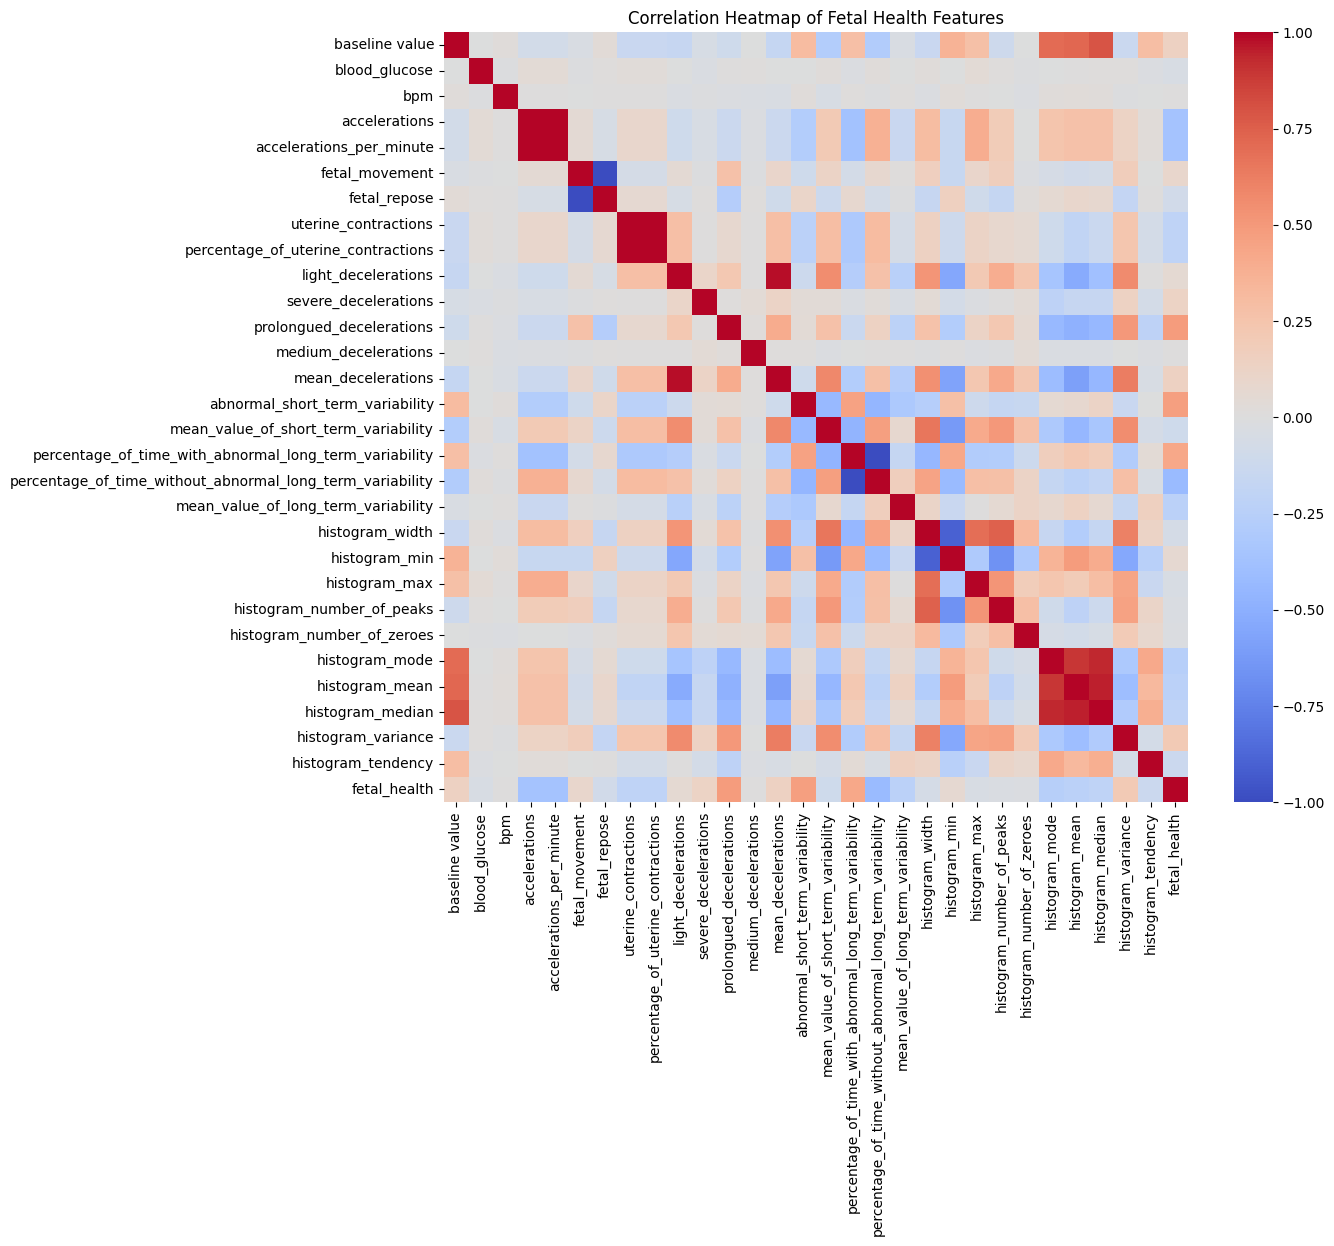

In [322]:
#Finding Duplicates
duplicates = fetal_health_df.duplicated().sum()
z_scores = stats.zscore(fetal_health_df.drop(columns='fetal_health'))
outliers = (abs(z_scores) > 3).sum()
correlation_matrix = fetal_health_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Fetal Health Features')
plt.show()

#duplicates, outliers, correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

### Inter Quartile Range

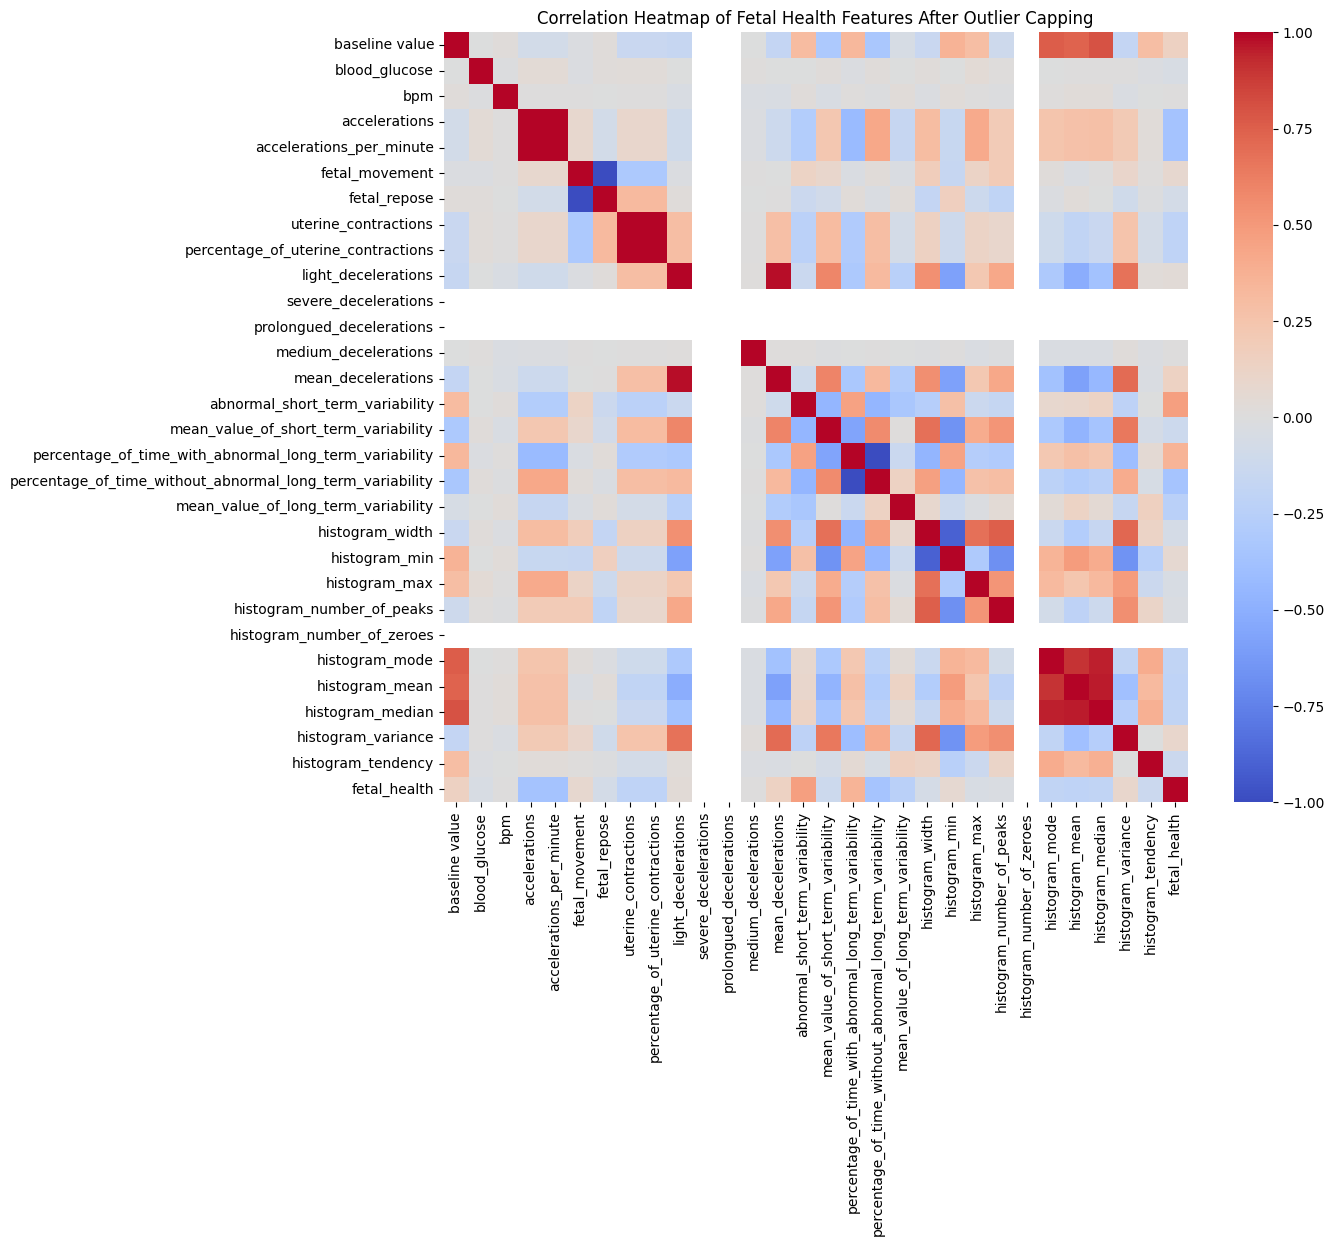

In [323]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower_bound, upper_bound)

fetal_health_capped_df = fetal_health_df.apply(lambda col: cap_outliers(col) if col.name != 'fetal_health' else col)
z_scores_capped = stats.zscore(fetal_health_capped_df.drop(columns='fetal_health'))
outliers_capped = (abs(z_scores_capped) > 3).sum()

correlation_matrix_capped = fetal_health_capped_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_capped, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Fetal Health Features After Outlier Capping')
plt.show()

#outliers_capped, correlation_matrix_capped.style.background_gradient(cmap='coolwarm').set_precision(2)

## Show your revised Data after removing Outliers:

Showing revised data comparing to original data

### Z-score and IQR capping

<Figure size 1500x1000 with 0 Axes>

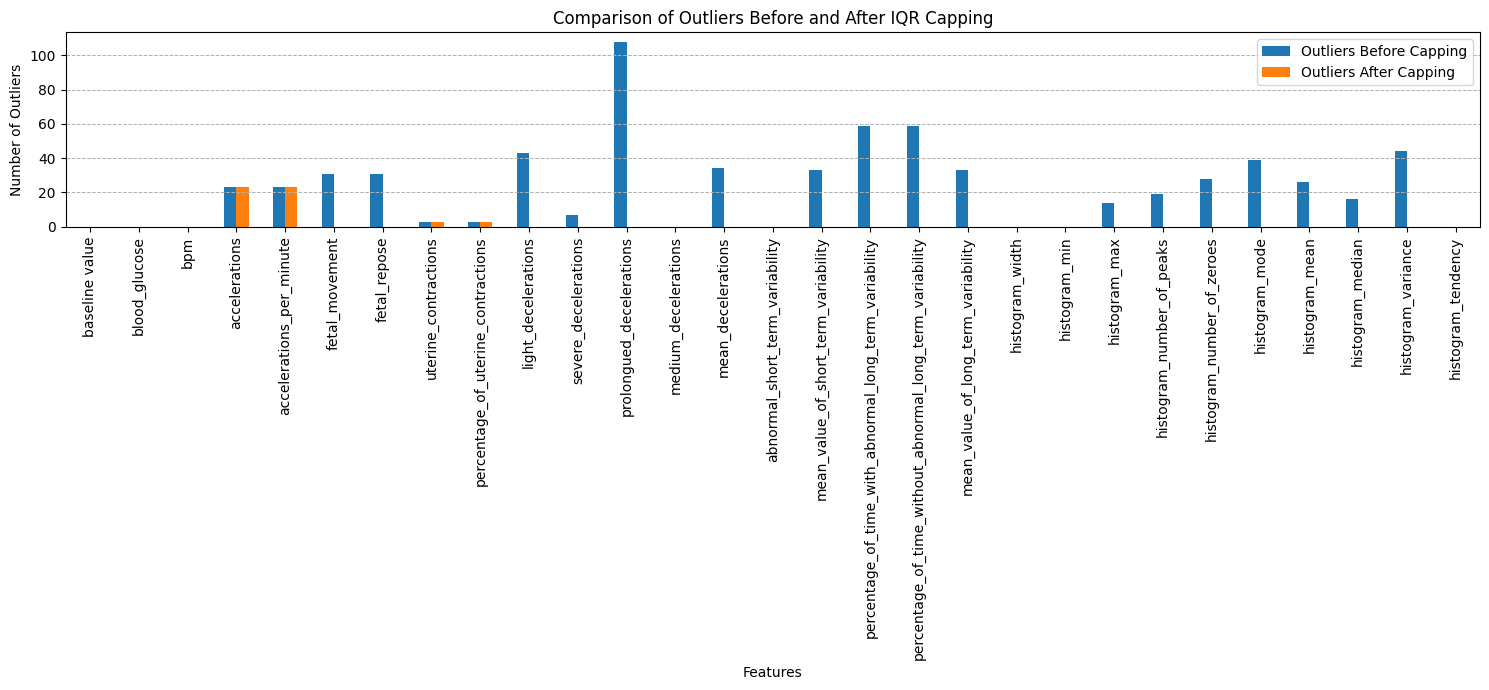

,Outliers Before Capping,Outliers After Capping
baseline value,0,0
blood_glucose,0,0
bpm,0,0
accelerations,23,23
accelerations_per_minute,23,23
fetal_movement,31,0
fetal_repose,31,0
uterine_contractions,3,3
percentage_of_uterine_contractions,3,3
light_decelerations,43,0


In [324]:
def calculate_outliers_zscore(df):
    z_scores = stats.zscore(df)
    outliers = (abs(z_scores) > 3).sum(axis=0)
    return outliers

outliers_before_capping = calculate_outliers_zscore(fetal_health_df.drop(columns='fetal_health'))

outliers_after_capping = calculate_outliers_zscore(fetal_health_capped_df.drop(columns='fetal_health'))

outliers_comparison_df = pd.DataFrame({
    'Outliers Before Capping': outliers_before_capping,
    'Outliers After Capping': outliers_after_capping
})

plt.figure(figsize=(15, 10))
outliers_comparison_df.plot(kind='bar', figsize=(15, 7))
plt.title('Comparison of Outliers Before and After IQR Capping')
plt.ylabel('Number of Outliers')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

outliers_comparison_df

# III. Tasks to do if Dealing with non-uniform data is Relevant to your Project

## Selected non-uniform data dealing Methods:

Dealing with non-uniform data is a common challenge in various fields, including data science, machine learning, and statistics. Non-uniform data refers to datasets where the distribution of values is not consistent, and some parts of the data may be more or less prevalent than others.
Below are some appropriate dealing methods with non-uniform data based on the nature of the data and the problem at hand.




1.   Weighted Loss Functions

  As we have observed earlier, the number of samples for class 1 is ~1600 making the other 2 classes as minority. We have assigned higher weights to these classes using the formula -

  *weight(i) = n_samples / (3 * n_samples(i)*,
  where i is the class label.

  However, we observed that while the recall improves, precision decreases for underrepresented class. This has made the analysis challenging.

2.  SMOTE (Synthetic Minority Over-sampling Technique)

  SMOTE is a specific technique for oversampling the minority class by generating synthetic examples. It creates new samples by interpolating between existing samples. The imbalanced-learn library in Python provides an implementation of SMOTE.



## Apply Dealing Methods with non-uniform data:

Implement the dealing methods with non-uniform data.

### SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) is a method used in data analysis to address class imbalance in datasets. It works by generating synthetic samples from the minority class to balance the class distribution. SMOTE does this by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are then added between the chosen point and its neighbors. This technique helps in improving the performance of machine learning models by providing a balanced dataset.

In [325]:
feature_names = fetal_health_df.drop('fetal_health', axis=1).columns.tolist()

X_df = fetal_health_df.drop('fetal_health', axis=1)
Y_df = fetal_health_df['fetal_health']

In [326]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_df, Y_df)

# Combine resampled data into a DataFrame with feature names
resampled_data = pd.DataFrame(X_resampled, columns=feature_names)
resampled_data['fetal_health'] = y_resampled

resampled_data.head(10)

,baseline value,blood_glucose,bpm,accelerations,accelerations_per_minute,fetal_movement,fetal_repose,uterine_contractions,percentage_of_uterine_contractions,light_decelerations,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,189,64,0.000,0.00,0.0,1.0,0.000,0.0,0.000,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,172,50,0.006,0.36,0.0,1.0,0.006,0.6,0.003,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,159,62,0.003,0.18,0.0,1.0,0.008,0.8,0.003,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,148,62,0.003,0.18,0.0,1.0,0.008,0.8,0.003,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,197,74,0.007,0.42,0.0,1.0,0.008,0.8,0.000,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,192,59,0.001,0.06,0.0,1.0,0.010,1.0,0.009,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,182,59,0.001,0.06,0.0,1.0,0.013,1.3,0.008,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,144,64,0.000,0.00,0.0,1.0,0.000,0.0,0.000,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,160,76,0.000,0.00,0.0,1.0,0.002,0.2,0.000,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,180,56,0.000,0.00,0.0,1.0,0.003,0.3,0.000,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


## Show your revised Data:

Show your revised data comparing to original data

In [327]:
print(X_df.shape)

print("Old sample sizefor each class\n",Y_df.value_counts())

(2126, 29)
Old sample sizefor each class
 1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


In [328]:
print(X_resampled.shape)

print("New sample sizefor each class\n",y_resampled.value_counts())

(4965, 29)
New sample sizefor each class
 2.0    1655
1.0    1655
3.0    1655
Name: fetal_health, dtype: int64


# IV. Tasks to do if Data Preprocessing is Relevant to your Project

## **Choose Your Data Preprocessing Methods:**

Numeric values(or features) in original data can be preprocessed


As there are no missing vales and duplicates found, Min-Max Normalization was used for scaling as part of preprocessing

**Min-Max Normalization**

This technique scales the values of a feature to a range between 0 and 1. This is done by subtracting the minimum value of the feature from each value, and then dividing by the range of the feature.

## Apply your Data Preprocessing Methods:

Implement the chosen preprocessing method on the original data.

In [329]:
# Scale the features
scaler = MinMaxScaler()
mm_scaled_data = scaler.fit_transform(X_resampled)

# Create a DataFrame for the scaled features
mm_scaled_df = pd.DataFrame(mm_scaled_data, columns=feature_names)

# Combine scaled features with the target variable
mm_scaled_df['fetal_health'] = y_resampled

## Show your Preprocessed Data:

Comparing preprocessed data to the original data

In [330]:
resampled_data.head(10)

,baseline value,blood_glucose,bpm,accelerations,accelerations_per_minute,fetal_movement,fetal_repose,uterine_contractions,percentage_of_uterine_contractions,light_decelerations,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,189,64,0.000,0.00,0.0,1.0,0.000,0.0,0.000,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,172,50,0.006,0.36,0.0,1.0,0.006,0.6,0.003,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,159,62,0.003,0.18,0.0,1.0,0.008,0.8,0.003,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,148,62,0.003,0.18,0.0,1.0,0.008,0.8,0.003,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,197,74,0.007,0.42,0.0,1.0,0.008,0.8,0.000,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,192,59,0.001,0.06,0.0,1.0,0.010,1.0,0.009,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,182,59,0.001,0.06,0.0,1.0,0.013,1.3,0.008,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,144,64,0.000,0.00,0.0,1.0,0.000,0.0,0.000,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,160,76,0.000,0.00,0.0,1.0,0.002,0.2,0.000,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,180,56,0.000,0.00,0.0,1.0,0.003,0.3,0.000,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [331]:
mm_scaled_df.head(10)

,baseline value,blood_glucose,bpm,accelerations,accelerations_per_minute,fetal_movement,fetal_repose,uterine_contractions,percentage_of_uterine_contractions,light_decelerations,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,0.259259,0.833333,0.482759,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,...,0.110092,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375,1.0,2.0
1,0.481481,0.518519,0.000000,0.315789,0.315789,0.0,1.0,0.400000,0.400000,0.200000,...,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0.5,1.0
2,0.500000,0.277778,0.413793,0.157895,0.157895,0.0,1.0,0.533333,0.533333,0.200000,...,0.165138,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0.5,1.0
3,0.518519,0.074074,0.413793,0.157895,0.157895,0.0,1.0,0.533333,0.533333,0.200000,...,0.027523,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,1.0,1.0
4,0.481481,0.981481,0.827586,0.368421,0.368421,0.0,1.0,0.533333,0.533333,0.000000,...,0.027523,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,1.0,1.0
5,0.518519,0.888889,0.310345,0.052632,0.052632,0.0,1.0,0.666667,0.666667,0.600000,...,0.000000,0.672414,0.277778,0.3,0.125984,0.311927,0.275229,0.631970,0.5,3.0
6,0.518519,0.703704,0.310345,0.052632,0.052632,0.0,1.0,0.866667,0.866667,0.533333,...,0.000000,0.672414,0.333333,0.3,0.086614,0.311927,0.266055,0.799257,0.5,3.0
7,0.296296,0.000000,0.482759,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,...,0.110092,0.068966,0.000000,0.0,0.488189,0.449541,0.422018,0.011152,1.0,3.0
8,0.296296,0.296296,0.896552,0.000000,0.000000,0.0,1.0,0.133333,0.133333,0.000000,...,0.110092,0.068966,0.000000,0.0,0.488189,0.449541,0.422018,0.011152,1.0,3.0
9,0.296296,0.666667,0.206897,0.000000,0.000000,0.0,1.0,0.200000,0.200000,0.000000,...,0.110092,0.068966,0.055556,0.0,0.488189,0.449541,0.422018,0.003717,1.0,3.0


# V. Preparation of Training and Testing Data

## Split the Data:
Divide the dataset into training and testing datasets.

In [332]:
# Separate features and target variable
X = mm_scaled_df.drop('fetal_health', axis=1)
y = mm_scaled_df['fetal_health']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test
def split_tt(X, y):
  return train_test_split(X, y, test_size=0.3, random_state=42)

In [333]:
X_train, X_test, y_train, y_test = split_tt(X, y)
print(X_train.shape)
X_train.head()

(3475, 29)


,baseline value,blood_glucose,bpm,accelerations,accelerations_per_minute,fetal_movement,fetal_repose,uterine_contractions,percentage_of_uterine_contractions,light_decelerations,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
4078,0.518519,0.629630,0.551724,0.164794,0.164794,0.000000,1.000000,0.000000,0.000000,0.008740,...,0.631563,0.146789,0.506781,0.451728,0.086890,0.220472,0.252517,0.226197,0.321221,0.0
1650,0.481481,0.555556,0.448276,0.421053,0.421053,0.000000,1.000000,0.533333,0.533333,0.866667,...,0.638418,0.183486,0.551724,0.166667,0.000000,0.661417,0.394495,0.550459,0.382900,0.5
4231,0.544532,0.574074,0.793103,0.000000,0.000000,0.002000,0.998000,0.666667,0.666667,0.488564,...,0.576056,0.060158,0.340682,0.357934,0.048094,0.481516,0.237133,0.309129,0.309542,0.5
112,0.425926,0.833333,0.896552,0.263158,0.263158,0.006237,0.993763,0.333333,0.333333,0.000000,...,0.502825,0.467890,0.612069,0.333333,0.000000,0.598425,0.559633,0.532110,0.014870,0.5
4962,0.448375,0.222222,0.793103,0.000000,0.000000,0.007588,0.992412,0.254996,0.254996,0.060832,...,0.336300,0.206362,0.112229,0.076039,0.000000,0.520521,0.453727,0.451318,0.024721,1.0


In [334]:
print(y_train.shape)
y_train.head()

(3475,)


4078    3.0
1650    1.0
4231    3.0
112     1.0
4962    3.0
Name: fetal_health, dtype: float64

# VI. Tasks to do if Feature Selection is Relevant to your Project

## Choosen Feature Selection Methods:

        
Below is the List of methods we have used and provided a short derscription of each.

**Filter Methods**

1. Correlation

  We have used co-relation method where we filtered highly corelated featues i.e. if the value is 1.0 it means that the features are identical and is least likely to contribute to the training of the models

2. F1_regression

  F1_regression is a filter method that evaluates the relevance of features based on statistical measures. It measures the relationship between each feature and the target variable using F1 score, which is commonly used in classification tasks. Filter methods evaluate the intrinsic characteristics of features independently of the machine learning model.

**Wrapper Methods**

  **RFE (Recursive Feature Elimination)**

  RFE is a wrapper method that iteratively fits the model with a subset of features and ranks them based on their impact on model performance. It starts with all features, fits the model, ranks features based on importance, and then removes the least important feature(s). This process is repeated until the desired number of features is reached. Wrapper methods evaluate subsets of features based on their impact on model performance and use the performance as the criterion for feature selection.

**Embedded Methods**

  **L1 Regularization**

  Description: L1 regularization, also known as Lasso regularization, is an embedded method. It introduces a penalty term to the loss function during model training that encourages sparsity in the model coefficients. As a result, L1 regularization can automatically perform feature selection by driving some coefficients to zero. It is embedded because the feature selection process is an inherent part of the model training.

## Apply Feature Selection Methods:

Below we have Implemented the chosen feature selection methods on the training data. This involves ranking or scoring features based on their relevance to the target variable.


#### Correlation matrix

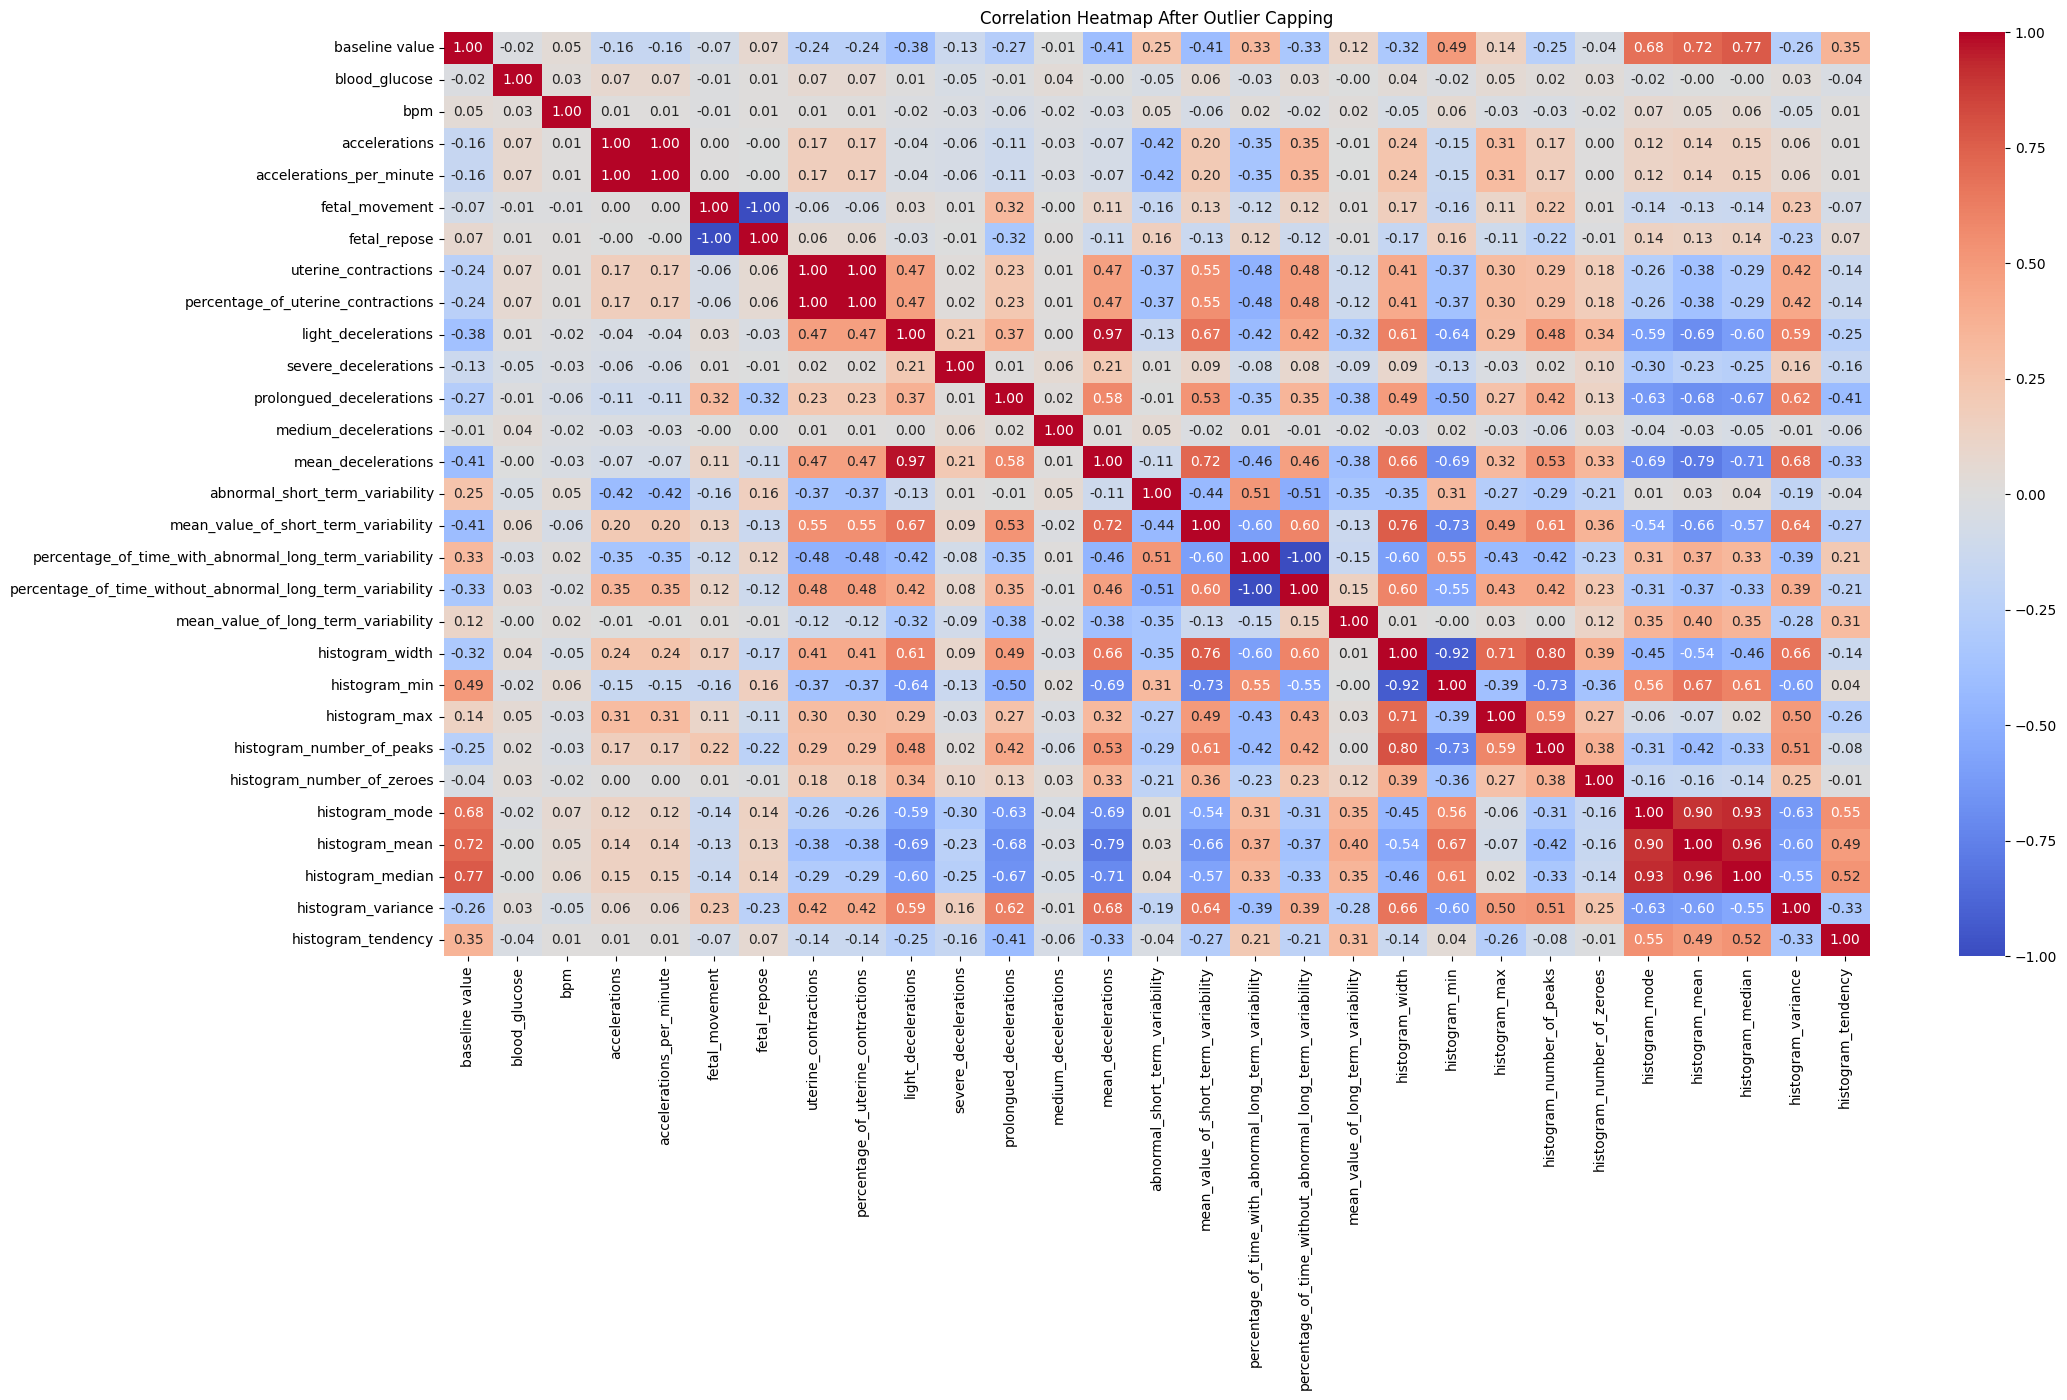

In [335]:
def identify_highly_correlated_features(df, threshold=0.9):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    correlated_pairs = [(i, j, corr_matrix.loc[i, j])
                        for i in corr_matrix.columns for j in corr_matrix.columns
                        if (i != j) and (corr_matrix.loc[i, j] > threshold)]

    return to_drop, correlated_pairs

features_to_drop_before, correlated_pairs_before = identify_highly_correlated_features(X)

plt.figure(figsize=(23, 12))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap After Outlier Capping')
plt.show()

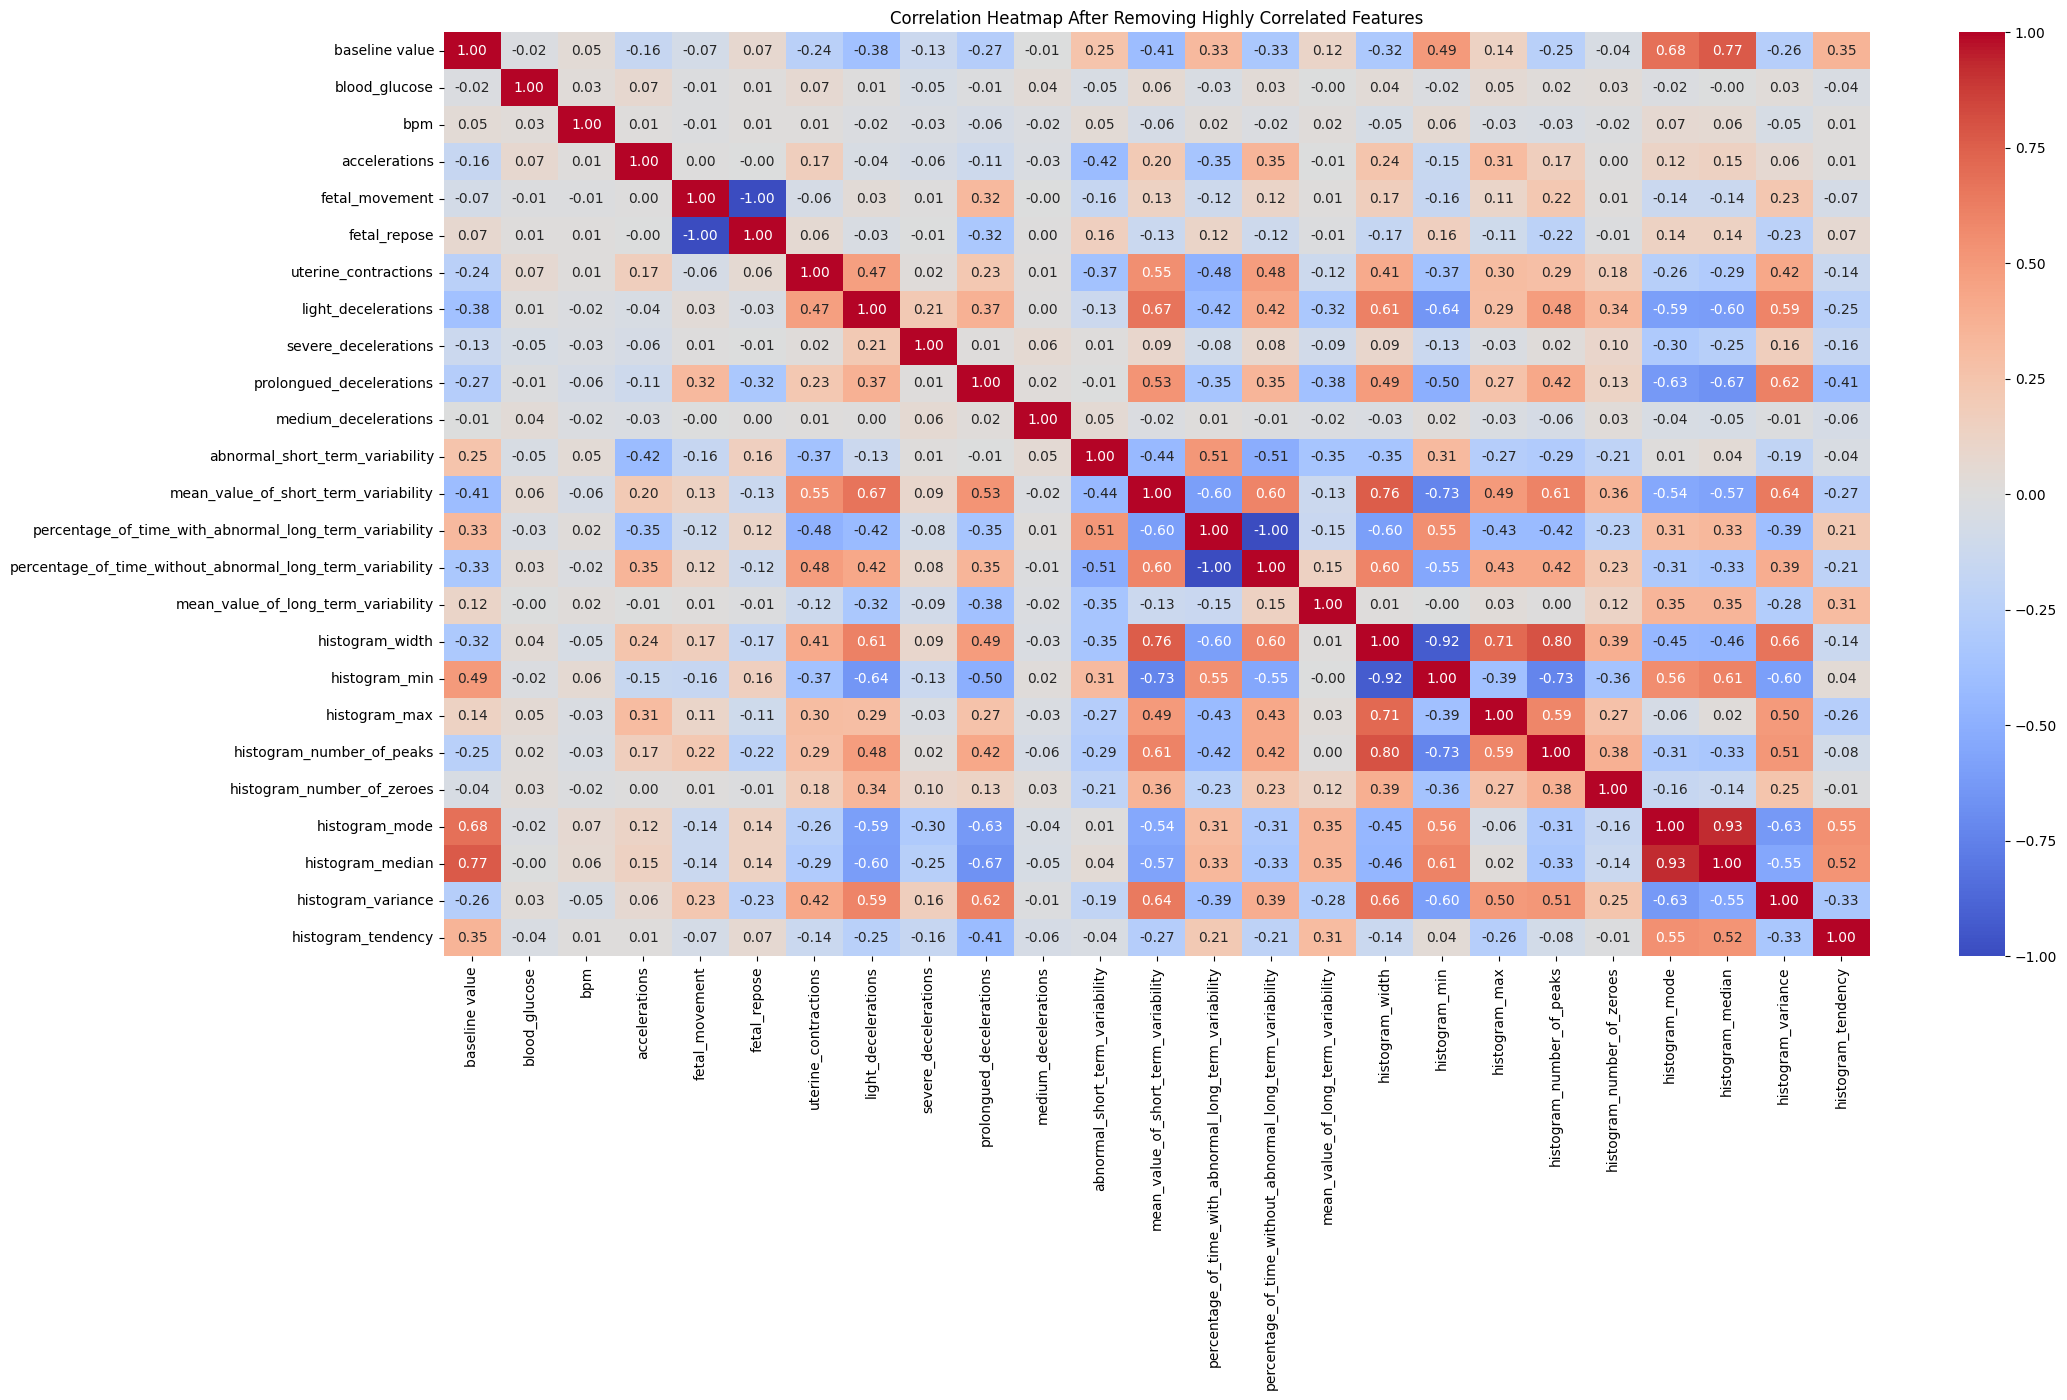

In [336]:
features_to_drop = [
    'accelerations_per_minute',
    'percentage_of_uterine_contractions',
    'mean_decelerations',
    'histogram_mean'
]

reduced_X = X.drop(columns=features_to_drop)
plt.figure(figsize=(23, 12))
sns.heatmap(reduced_X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap After Removing Highly Correlated Features')
plt.show()

In [337]:
reduced_X.head()
print(reduced_X.shape)

(4965, 25)


#### **Select K best**

In [338]:
feature_names = fetal_health_df.drop('fetal_health', axis=1).columns.tolist()

X_df = fetal_health_df.drop('fetal_health', axis=1)
Y_df = fetal_health_df['fetal_health']

In [339]:
selector = SelectKBest(score_func=f_regression, k=24)
X_selected = selector.fit_transform(fetal_health_df.drop('fetal_health', axis=1), fetal_health_df['fetal_health'])

# Use the boolean array from selector.get_support() to index feature_names
kselected_feature_names = [feature_names[i] for i, selected in enumerate(selector.get_support()) if selected]

# Create a DataFrame with the selected features
X_selected_df = pd.DataFrame(X_selected, columns=kselected_feature_names)

# Add the 'fetal_health' column to X_selected_df
X_selected_df['fetal_health'] = fetal_health_df['fetal_health']

In [340]:
X_selected_df.head()

,baseline value,accelerations,accelerations_per_minute,fetal_movement,fetal_repose,uterine_contractions,percentage_of_uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,...,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.00,0.0,1.0,0.000,0.0,0.000,0.0,0.0,...,2.4,64.0,62.0,126.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.36,0.0,1.0,0.006,0.6,0.003,0.0,0.0,...,10.4,130.0,68.0,198.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.18,0.0,1.0,0.008,0.8,0.003,0.0,0.0,...,13.4,130.0,68.0,198.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.18,0.0,1.0,0.008,0.8,0.003,0.0,0.0,...,23.0,117.0,53.0,170.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.42,0.0,1.0,0.008,0.8,0.000,0.0,0.0,...,19.9,117.0,53.0,170.0,137.0,136.0,138.0,11.0,1.0,1.0


In [341]:
len(X_selected_df.columns)

25

### L1 regularization


In [342]:
def not_selected(df1, df2):
  df1_columns = set(df1.columns)
  df2_columns = set(df2.columns)

  # Find the features in df1 that are not present in df2
  not_selected_features = df1_columns - df2_columns

  # Print or work with the result
  print("Features in fetal_health but not selected:\n")
  print(not_selected_features)

In [343]:
lasso_model = Lasso(alpha=0.01)  # Adjust the alpha (regularization strength) as needed
lasso_model.fit(X_df, Y_df)
lasso_selected_features = lasso_model.coef_ != 0
lasso_selected_features

lasso_selected_feature_names = [feature_names[i] for i, selected in enumerate(lasso_selected_features) if selected]
lasso_X_selected_df = X_df[lasso_selected_feature_names]

not_selected(fetal_health_df, lasso_X_selected_df)

Features in fetal_health but not selected:

{'histogram_number_of_zeroes', 'fetal_repose', 'severe_decelerations', 'fetal_health', 'uterine_contractions', 'light_decelerations', 'histogram_tendency', 'accelerations', 'fetal_movement', 'mean_decelerations', 'accelerations_per_minute', 'medium_decelerations', 'prolongued_decelerations', 'mean_value_of_short_term_variability'}


In [344]:
print(len(lasso_model.coef_ != 0))

29


### Recursive Feature Elimination - RFE
 See the further section for it's implmenation and analysis

## Split data for learning

In [345]:
X_train, X_test, y_train, y_test = split_tt(reduced_X, y)

## Evaluate Models Performance:

Below we Trained the machine learning models using the selected features and evaluated their performance on the testing set using Measure metrics such as accuracy, precision, recall, and F1 score.

### Logistic regression

In [346]:
def apply_LR(xtrain, xtest, ytrain, ytest):

    # Initialize the Logistic Regression model
    logistic_model = LogisticRegression(random_state=42, max_iter=10000, solver="sag")

    # Train the model
    logistic_model.fit(xtrain, ytrain)

    # Get the feature importance scores (coefficients)
    feature_importance = logistic_model.coef_

    # Create a DataFrame to associate features with their importance scores
    importance_df = pd.DataFrame({'Feature': xtrain.columns})
    for class_label in range(len(logistic_model.classes_)):
        importance_df[f'Importance_Class_{class_label + 1}'] = feature_importance[class_label]

    # Display the feature importance scores
    #print(importance_df)

        # Find the top 3 features for each class
    top_features = {}
    for class_label in range(len(logistic_model.classes_)):
        sorted_features = importance_df[['Feature', f'Importance_Class_{class_label + 1}']].sort_values(by=f'Importance_Class_{class_label + 1}', ascending=False)
        top_features[f'Top_Features_Class_{class_label + 1}'] = sorted_features['Feature'][:3].values

    print("Top 3 Features for Each Class:\n")
    print(top_features)

    # Make predictions
    y_pred = logistic_model.predict(xtest)

    # Evaluate the model
    accuracy = accuracy_score(ytest, y_pred)
    classification_rep = classification_report(ytest, y_pred)

    print(f"Accuracy: {accuracy}\n")
    print(classification_rep)

    cm = confusion_matrix(ytest, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

### Random Forest Classifier

In [347]:
def rfc(xtrain, xtest, ytrain, ytest):

    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(xtrain, ytrain)
    feature_importance = rf_classifier.feature_importances_

    importance_df = pd.DataFrame({
        'Feature': xtrain.columns,
        'Importance': feature_importance
    })

    y_pred = rf_classifier.predict(xtest)


    accuracy = accuracy_score(ytest, y_pred)

    classification_rep = classification_report(ytest, y_pred)

    print(f"Accuracy: {accuracy}\n\n")
    print(classification_rep)

    cm = confusion_matrix(ytest, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    print(importance_df, accuracy, classification_rep)

### Recursive Feature Elimination


In [348]:
# Initialize the Logistic Regression model

def rfe_lr(xtrain, xtest, ytrain, ytest):

  logistic_model = LogisticRegression(max_iter=10000, solver="sag", random_state=42)

  # Create a custom scoring function (e.g., accuracy) to use in cross-validation
  custom_scorer = make_scorer(accuracy_score)

  # Initialize RFECV with cross-validation
  rfecv = RFECV(estimator=logistic_model, step=1, cv=5, scoring=custom_scorer)

  # Fit RFECV to the training data
  rfecv.fit(xtrain, ytrain)

  # Get the optimal number of features
  optimal_num_features = rfecv.n_features_

  # Transform the training and testing data to include only the selected features
  X_train_selected = xtrain.iloc[:, rfecv.support_]
  X_test_selected = xtest.iloc[:, rfecv.support_]

  # Train a Logistic Regression model on the selected features
  logistic_model_selected = LogisticRegression(max_iter=10000, solver="sag", random_state=42)
  logistic_model_selected.fit(X_train_selected, ytrain)

  # Make predictions
  y_pred = logistic_model_selected.predict(X_test_selected)

  # Evaluate the model
  accuracy = accuracy_score(ytest, y_pred)
  print(f"Optimal Number of Features: {optimal_num_features}")
  print(f"Accuracy: {accuracy}")

## Compare Models Performance:

A comparative analysis of the relative performance of the used models.

### Logistic Regression

Top 3 Features for Each Class:

{'Top_Features_Class_1': array(['accelerations', 'uterine_contractions',
       'mean_value_of_short_term_variability'], dtype=object), 'Top_Features_Class_2': array(['histogram_median', 'histogram_number_of_peaks', 'histogram_mode'],
      dtype=object), 'Top_Features_Class_3': array(['abnormal_short_term_variability', 'prolongued_decelerations',
       'histogram_variance'], dtype=object)}
Accuracy: 0.8684563758389262

              precision    recall  f1-score   support

         1.0       0.96      0.85      0.90       520
         2.0       0.78      0.89      0.83       485
         3.0       0.89      0.86      0.88       485

    accuracy                           0.87      1490
   macro avg       0.87      0.87      0.87      1490
weighted avg       0.88      0.87      0.87      1490



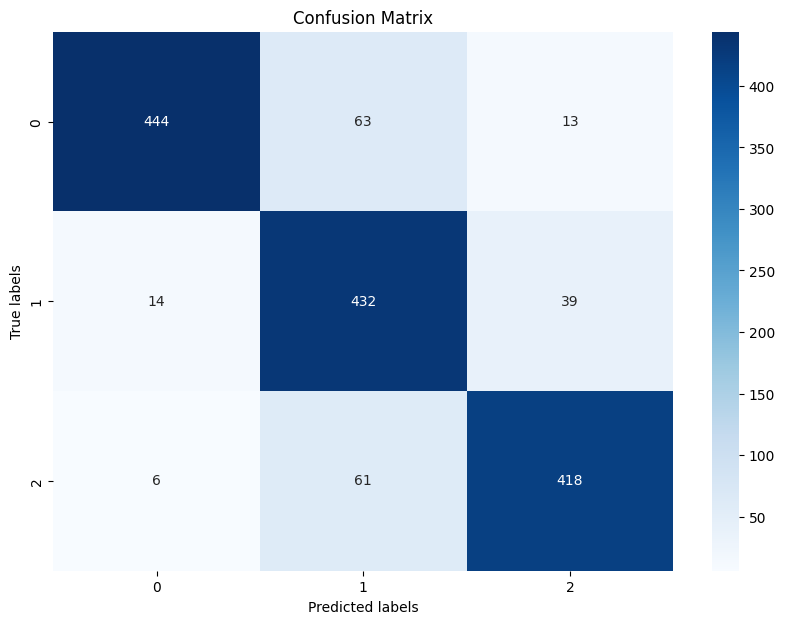

In [349]:
apply_LR(X_train, X_test, y_train, y_test)

### Random Forest Classifier

Accuracy: 0.9791946308724833


              precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       520
         2.0       0.95      0.99      0.97       485
         3.0       0.99      1.00      0.99       485

    accuracy                           0.98      1490
   macro avg       0.98      0.98      0.98      1490
weighted avg       0.98      0.98      0.98      1490



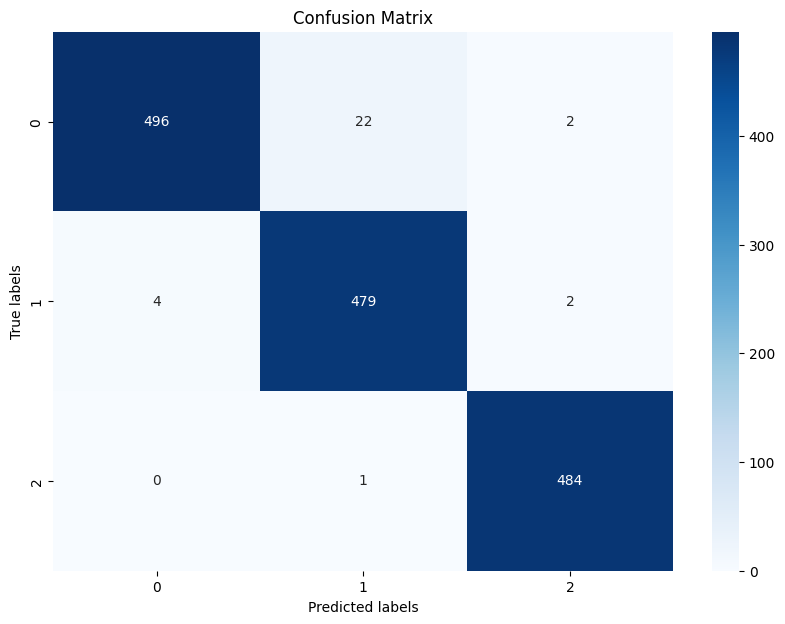

                                              Feature  Importance
0                                      baseline value    0.038474
1                                       blood_glucose    0.008390
2                                                 bpm    0.005108
3                                       accelerations    0.091688
4                                      fetal_movement    0.012009
5                                        fetal_repose    0.012511
6                                uterine_contractions    0.019399
7                                 light_decelerations    0.009802
8                                severe_decelerations    0.001096
9                            prolongued_decelerations    0.086450
10                               medium_decelerations    0.010789
11                    abnormal_short_term_variability    0.113662
12               mean_value_of_short_term_variability    0.052314
13  percentage_of_time_with_abnormal_long_term_var...    0.106005
14  percen

In [350]:
rfc(X_train, X_test, y_train, y_test)

### Recursive Feature Elimination

Applying RFE to Logistic Regression model

In [351]:
rfe_lr(X_train, X_test, y_train, y_test)

Optimal Number of Features: 22
Accuracy: 0.8630872483221477


# VIII. Tasks to do if Feature Extraction is Relevant to your Project

## Selected Feature Extraction Methods:

Below is the List of methods we  used for feature extraction

### Unsupervised

**Principal Component Analysis (PCA):**

  **Objective:** PCA aims to transform the original features into a new set of uncorrelated features, known as principal components, which are ordered by the amount of variance they explain.

  **Process:** PCA identifies the directions (principal components) in which the data varies the most and projects the data onto these components. The first few principal components capture the majority of the variance in the data.

  **Use Case:** PCA is commonly used when the goal is to reduce the dimensionality of the data while retaining as much variance as possible. It is agnostic to class labels and focuses on overall data variance.

### Supervised

1. **Linear Discriminant Analysis (LDA)**:

  **Objective:** LDA aims to find a linear combination of features that best separates different classes in the data.

  **Process:** LDA looks for the directions (discriminants) that maximize the ratio of between-class variance to within-class variance. It projects the data onto these discriminants.

  **Use Case:** LDA is particularly useful in classification tasks where the goal is to find features that maximize class separability. Unlike PCA, LDA considers class labels in its objective function.

2. **Independent Component Analysis (ICA)**:

  **Objective:** ICA aims to find a linear transformation of the data such that the resulting components are statistically independent.

  **Process:** ICA identifies components that are as independent as possible, meaning that the statistical information in one component is not present in others. It assumes that the observed data is a linear combination of statistically independent sources.

  **Use Case:** ICA is often used in scenarios where the goal is to uncover hidden factors or sources that contribute to the observed data. It is applied in signal processing, blind source separation, and scenarios where the assumption of independence is justified.

## Feature Scaling:

Before you apply the chosen methods, you may need to normalize or scale features as needed (especially when using techniques like PCA or neural networks).

In [352]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [353]:
X_train_scaled.shape

(3475, 25)

## Apply your Feature Extraction Methods:

Implement the chosen feature extraction method on the dataset to obtain a reduced set of features or transformed representations.

### PCA

In [354]:
def do_pca(cv = "mle"):

  # Apply PCA
  pca = PCA()
  X_train_pca = pca.fit_transform(X_train_scaled)

  n_components = None

  if cv != "mle":
    # Plot the cumulative explained variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(cumulative_variance)
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()

    # Determine the optimal number of components based on a threshold (e.g., 95%)
    threshold = 1
    n_components = np.argmax(cumulative_variance >= threshold) + 1
  else:
    n_components = cv

  # Apply PCA with the optimal number of components
  pca = PCA(n_components=n_components)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)

  return X_train_pca, X_test_pca

## Evaluate Results and Potentially Reiterate the Process:

Assess the effectiveness of the feature extraction processes. This may involve checking the variance, visualizing data in the reduced feature space, or evaluating the impact on model performance.

If model performance is not satisfactory, iterate on the feature extraction process by adjusting parameters or trying different methods.

You may also consider incorporating Domain Knowledge to guide the feature extraction process. Understanding the context of the data, therefore, can be helpful in selecting meaningful features.

### PCA

#### Logistic Regression

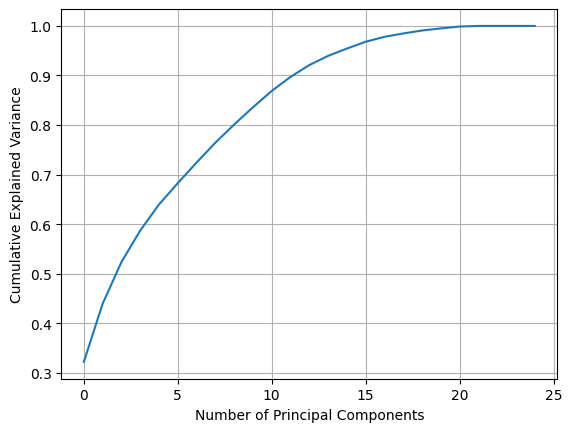

Accuracy: 0.881879
              precision    recall  f1-score   support

         1.0       0.97      0.87      0.92       520
         2.0       0.80      0.87      0.84       485
         3.0       0.88      0.90      0.89       485

    accuracy                           0.88      1490
   macro avg       0.89      0.88      0.88      1490
weighted avg       0.89      0.88      0.88      1490



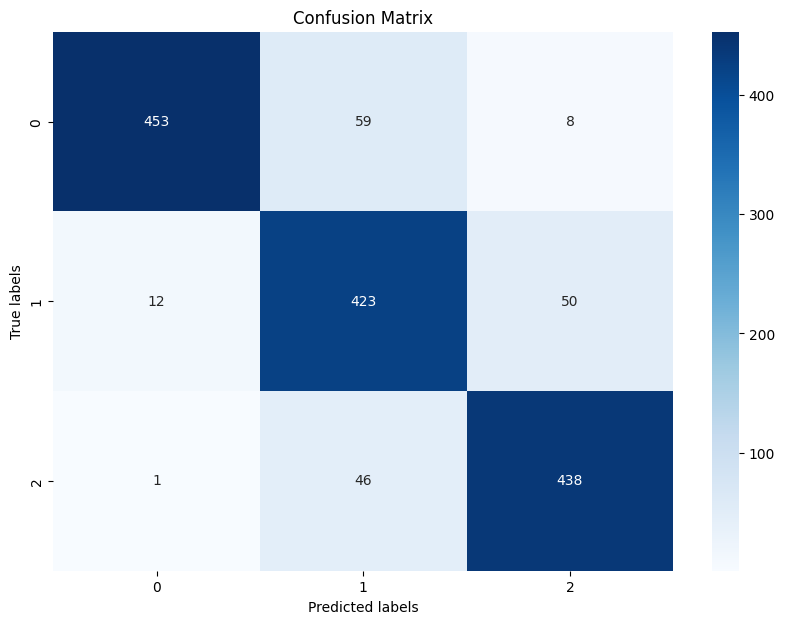

In [355]:
  # apply pca cumulative
X_train_pca, X_test_pca = do_pca(None)

# Train logistic regression on the transformed data
lr = LogisticRegression(max_iter=10000, solver="sag")
lr.fit(X_train_pca, y_train)

# Make predictions
y_pred = lr.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.6f}')

# Additional evaluation metrics
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

##### Maximum Likelihood Estimate

Accuracy: 0.881879
              precision    recall  f1-score   support

         1.0       0.97      0.87      0.92       520
         2.0       0.80      0.87      0.84       485
         3.0       0.88      0.90      0.89       485

    accuracy                           0.88      1490
   macro avg       0.89      0.88      0.88      1490
weighted avg       0.89      0.88      0.88      1490



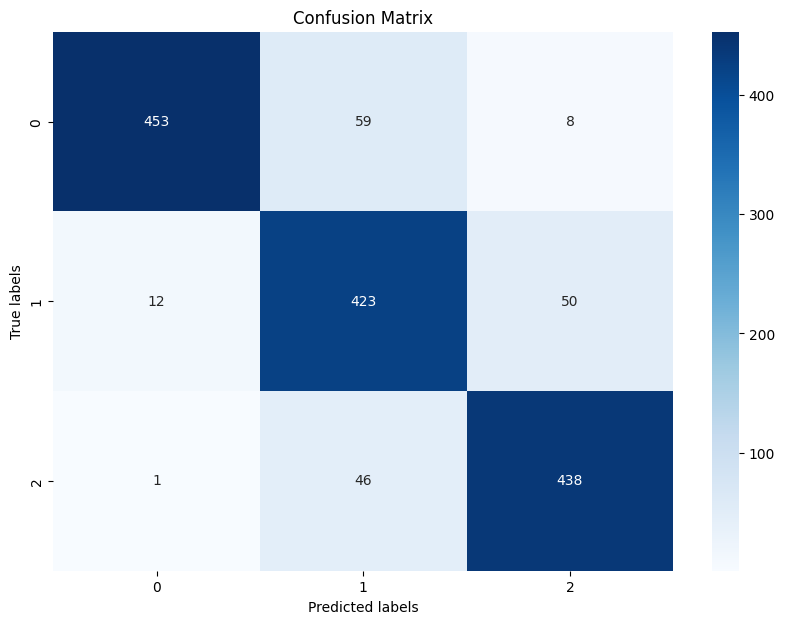

In [356]:
# Maximim likelyhood
X_train_pca, X_test_pca = do_pca()

# Train logistic regression on the transformed data
lr = LogisticRegression(max_iter=10000, solver="sag")
lr.fit(X_train_pca, y_train)

# Make predictions
y_pred = lr.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.6f}')

# Additional evaluation metrics
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#### Random Forest Classifier

Accuracy: 0.96
              precision    recall  f1-score   support

         1.0       0.99      0.91      0.95       520
         2.0       0.91      0.98      0.95       485
         3.0       0.99      0.99      0.99       485

    accuracy                           0.96      1490
   macro avg       0.96      0.96      0.96      1490
weighted avg       0.96      0.96      0.96      1490



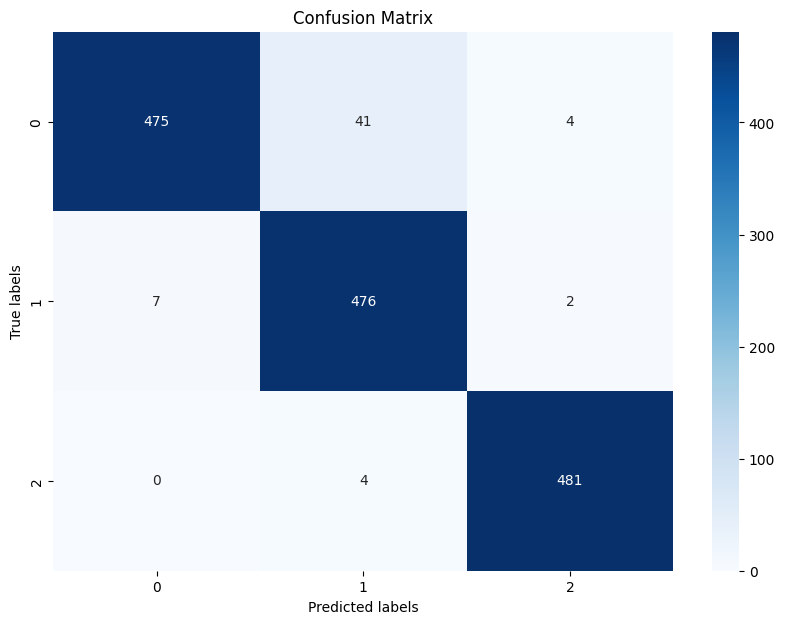

In [357]:
# apply pca
X_train_pca, X_test_pca = do_pca()

# Train a Random Forest classifier on the resampled and PCA-transformed data
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Evaluate the model
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Linear Discriminant Analysis
LDA is a supervised dimensionality reduction technique that aims to maximize the separability between classes while reducing the dimensionality of the feature space. It's commonly used in classification tasks.

In [358]:
def do_lda():

  # Apply LDA with a dynamic approach to determine the optimal number of components
  lda = LinearDiscriminantAnalysis(n_components=None)
  X_train_lda = lda.fit_transform(X_train_scaled, y_train)

  # Plot the explained variance ratio
  explained_variance_ratio = lda.explained_variance_ratio_
  cumulative_variance = np.cumsum(explained_variance_ratio)
  plt.plot(cumulative_variance)
  plt.xlabel('Number of Components')
  plt.ylabel('Cumulative Explained Variance')
  plt.grid(True)
  plt.show()

  # Determine the optimal number of components based on a threshold (e.g., 95%)
  threshold = 1.0
  n_components = np.argmax(cumulative_variance >= threshold) + 1

  # Apply LDA with the optimal number of components
  lda = LinearDiscriminantAnalysis(n_components=n_components)
  X_train_lda = lda.fit_transform(X_train_scaled, y_train)
  X_test_lda = lda.transform(X_test_scaled)

  return X_train_lda, X_test_lda


#### Logistic regression

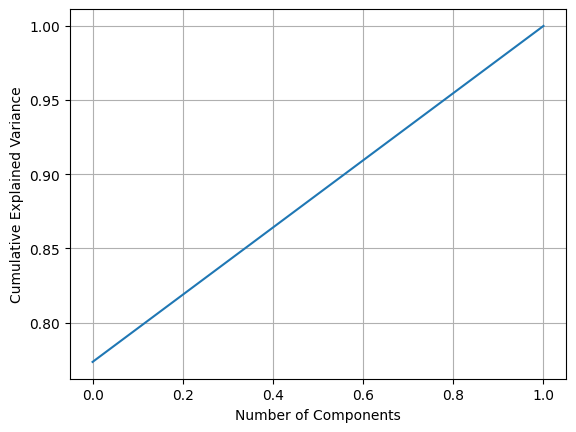

Accuracy: 0.85
              precision    recall  f1-score   support

         1.0       0.95      0.85      0.90       520
         2.0       0.76      0.85      0.80       485
         3.0       0.86      0.85      0.86       485

    accuracy                           0.85      1490
   macro avg       0.86      0.85      0.85      1490
weighted avg       0.86      0.85      0.85      1490



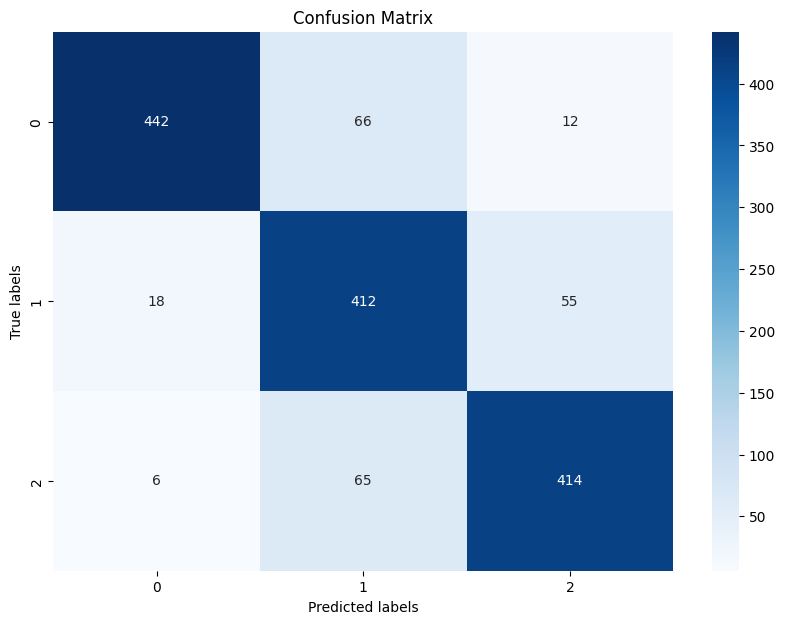

In [359]:
# apply lda
X_train_lda, X_test_lda = do_lda()

# Train logistic regression on the transformed data
lr = LogisticRegression(max_iter=10000, solver="sag")
lr.fit(X_train_lda, y_train)

# Make predictions
y_pred = lr.predict(X_test_lda)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
lda_lr_acc = accuracy
print(f'Accuracy: {accuracy:.2f}')

# Additional evaluation metrics
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
lda_lr_cm = cm

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#### Support Vector Machine

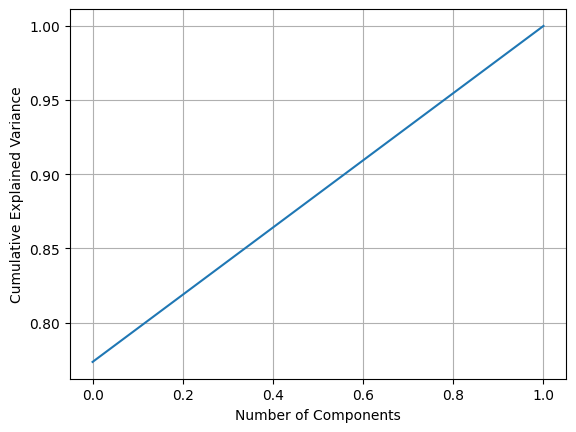

Cross-Validation Scores: [0.84892086 0.8705036  0.89208633 0.87338129 0.88057554]
Mean CV Accuracy: 0.8730935251798562
Accuracy: 0.86
              precision    recall  f1-score   support

         1.0       0.96      0.84      0.89       520
         2.0       0.75      0.92      0.83       485
         3.0       0.92      0.83      0.87       485

    accuracy                           0.86      1490
   macro avg       0.88      0.86      0.86      1490
weighted avg       0.88      0.86      0.87      1490



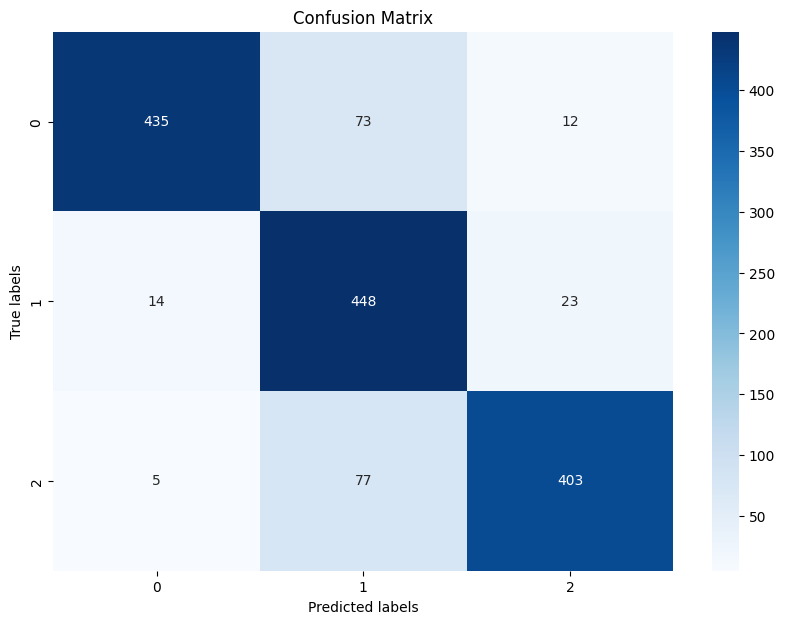

In [360]:
# apply lda
X_train_lda, X_test_lda = do_lda()

# Train SVM on the transformed data
svm = SVC()  # You can choose different kernels based on your requirements

# Perform cross-validation
cv_scores = cross_val_score(svm, X_train_lda, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Fit the SVM model on the full training set
svm.fit(X_train_lda, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_lda)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
lda_svm_acc = accuracy
print(f'Accuracy: {accuracy:.2f}')

# Additional evaluation metrics
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
lda_svm_cm = cm

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#### Qudratic Discriminant Analysis

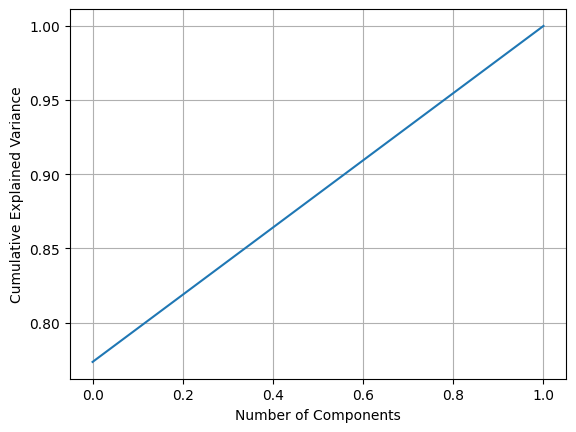

Cross-Validation Scores: [0.84172662 0.86043165 0.88633094 0.8676259  0.86906475]
Mean CV Accuracy: 0.8650359712230216
Accuracy: 0.86
              precision    recall  f1-score   support

         1.0       0.97      0.82      0.89       520
         2.0       0.74      0.91      0.82       485
         3.0       0.89      0.85      0.87       485

    accuracy                           0.86      1490
   macro avg       0.87      0.86      0.86      1490
weighted avg       0.87      0.86      0.86      1490



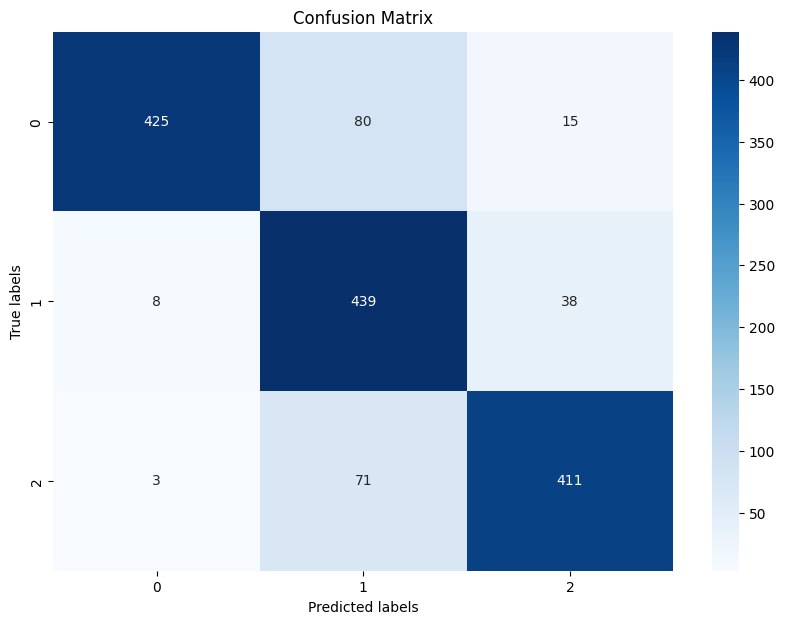

In [361]:
# apply lda
X_train_lda, X_test_lda = do_lda()

qda = QuadraticDiscriminantAnalysis(reg_param=0.3)

# Perform cross-validation
cv_scores = cross_val_score(qda, X_train_lda, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Fit the QDA model on the full training set
qda.fit(X_train_lda, y_train)

# Make predictions on the test set
y_pred = qda.predict(X_test_lda)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
lda_qda_acc = accuracy
print(f'Accuracy: {accuracy:.2f}')

# Additional evaluation metrics
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
lda_qda_cm = cm

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#### Random forest classifier

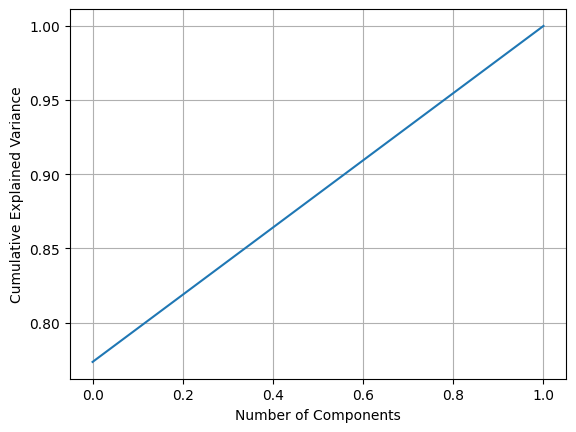

Best Parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 200}
Best Accuracy: 0.8886330935251798
Accuracy: 0.88
              precision    recall  f1-score   support

         1.0       0.92      0.87      0.89       520
         2.0       0.80      0.87      0.83       485
         3.0       0.92      0.89      0.90       485

    accuracy                           0.88      1490
   macro avg       0.88      0.88      0.88      1490
weighted avg       0.88      0.88      0.88      1490



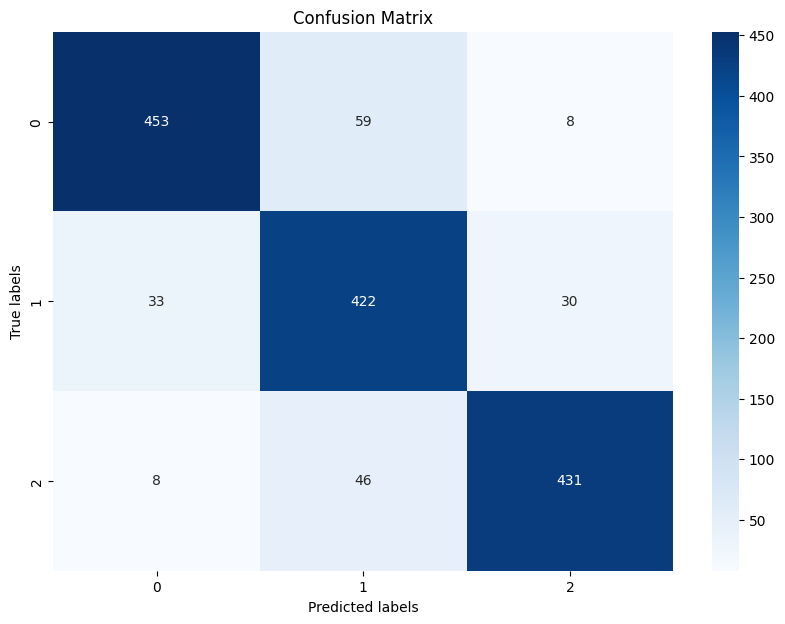

In [362]:
# apply lda
X_train_lda, X_test_lda = do_lda()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_lda, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Access the best model from the grid search
best_rfc = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rfc.predict(X_test_lda)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
lda_rfc_acc = accuracy
print(f'Accuracy: {accuracy:.2f}')

# Additional evaluation metrics
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
lda_rfc_cm = cm

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Independent component analysis

#### Random Forest Classsfier

In [363]:
# Apply ICA
ica = FastICA(n_components=10, random_state=42, max_iter=200, tol=0.3, whiten='unit-variance')
X_train_ica = ica.fit_transform(X_train_scaled)
X_test_ica = ica.transform(X_test_scaled)


Best Parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}
Best Accuracy: 0.9470503597122303
Accuracy: 0.94
              precision    recall  f1-score   support

         1.0       0.97      0.89      0.93       520
         2.0       0.89      0.98      0.93       485
         3.0       0.98      0.98      0.98       485

    accuracy                           0.94      1490
   macro avg       0.95      0.95      0.95      1490
weighted avg       0.95      0.94      0.94      1490



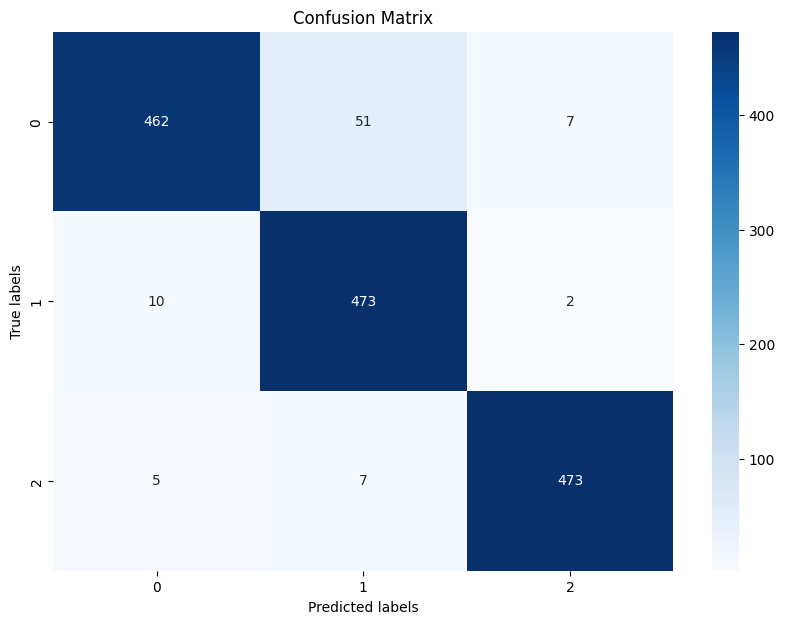

(0.9449664429530201,
 '              precision    recall  f1-score   support\n\n         1.0       0.97      0.89      0.93       520\n         2.0       0.89      0.98      0.93       485\n         3.0       0.98      0.98      0.98       485\n\n    accuracy                           0.94      1490\n   macro avg       0.95      0.95      0.95      1490\nweighted avg       0.95      0.94      0.94      1490\n',
 array([[462,  51,   7],
        [ 10, 473,   2],
        [  5,   7, 473]]))

In [364]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_ica, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Access the best model from the grid search
best_rfc = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rfc.predict(X_test_ica)

# Evaluate the best model
accuracy_ica_rf = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_ica_rf:.2f}')

# Additional evaluation metrics
print(classification_report(y_test, y_pred))
cm_rf_ica_rpt=classification_report(y_test, y_pred)
cm_rf_ica = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf_ica, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
accuracy_ica_rf, cm_rf_ica_rpt, cm_rf_ica

#### Logistic Regression

Cross-Validation Scores: [0.82589928 0.84460432 0.87194245 0.84460432 0.85035971]
Mean CV Accuracy: 0.8474820143884891
Accuracy: 0.84
              precision    recall  f1-score   support

         1.0       0.93      0.85      0.89       520
         2.0       0.75      0.84      0.79       485
         3.0       0.85      0.83      0.84       485

    accuracy                           0.84      1490
   macro avg       0.84      0.84      0.84      1490
weighted avg       0.84      0.84      0.84      1490



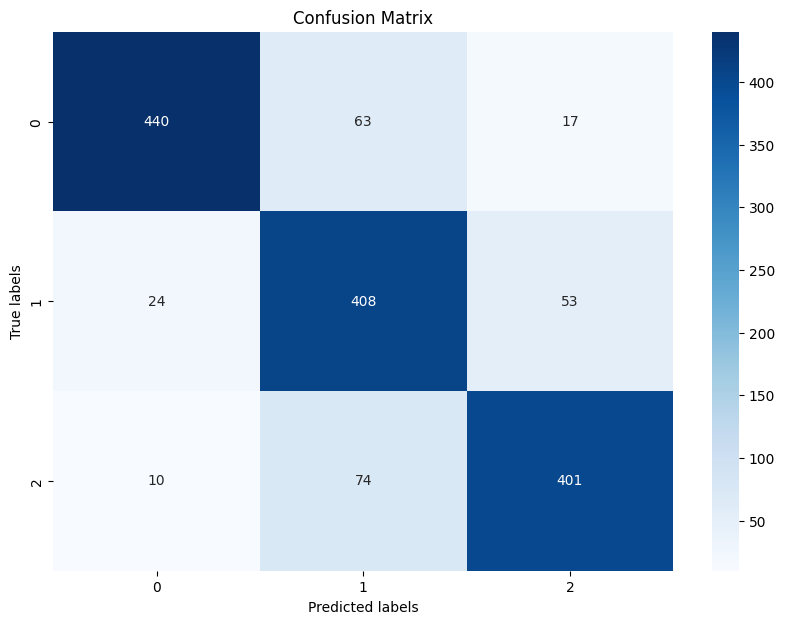

(array([0.82589928, 0.84460432, 0.87194245, 0.84460432, 0.85035971]),
 0.838255033557047,
 '              precision    recall  f1-score   support\n\n         1.0       0.93      0.85      0.89       520\n         2.0       0.75      0.84      0.79       485\n         3.0       0.85      0.83      0.84       485\n\n    accuracy                           0.84      1490\n   macro avg       0.84      0.84      0.84      1490\nweighted avg       0.84      0.84      0.84      1490\n',
 array([[440,  63,  17],
        [ 24, 408,  53],
        [ 10,  74, 401]]))

In [365]:
# Train logistic regression on the transformed data
lr = LogisticRegression(max_iter=10000, solver="sag")

# Perform cross-validation
cv_scores_ica_lr = cross_val_score(lr, X_train_ica, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores_ica_lr)
print("Mean CV Accuracy:", np.mean(cv_scores_ica_lr))

# Train the logistic regression on the full training set
lr.fit(X_train_ica, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test_ica)

# Evaluate the model
accuracy_ica_lr = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_ica_lr:.2f}')

# Additional evaluation metrics
print(classification_report(y_test, y_pred))
cm_lr_ica_rpt=classification_report(y_test, y_pred)
cm_LR_ica = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_LR_ica, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
cv_scores_ica_lr, accuracy_ica_lr, cm_lr_ica_rpt, cm_LR_ica

In [366]:
# Define class weights based on your dataset
class_weights = {
    1: len(y_train) / (3 * np.bincount(y_train)[1]),
    2: len(y_train) / (3 * np.bincount(y_train)[2]),
    3: len(y_train) / (3 * np.bincount(y_train)[3])
}

# Train logistic regression with custom class weights
lr = LogisticRegression(max_iter=10000, solver="sag", class_weight=class_weights, C = 2.0)
lr.fit(X_train_ica, y_train)

# Make predictions
y_pred = lr.predict(X_test_ica)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Additional evaluation metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.84
              precision    recall  f1-score   support

         1.0       0.93      0.85      0.89       520
         2.0       0.75      0.84      0.79       485
         3.0       0.85      0.83      0.84       485

    accuracy                           0.84      1490
   macro avg       0.84      0.84      0.84      1490
weighted avg       0.84      0.84      0.84      1490



#### Support Vector Machine

Cross-Validation Scores: [0.88489209 0.91942446 0.91798561 0.89784173 0.90935252]
Mean CV Accuracy: 0.9058992805755395
Accuracy: 0.84


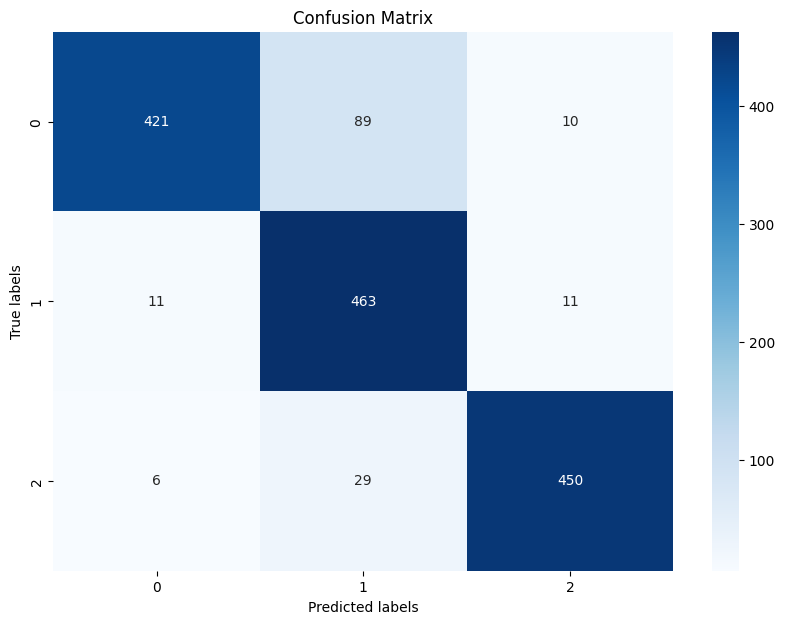

(array([0.88489209, 0.91942446, 0.91798561, 0.89784173, 0.90935252]),
 0.8953020134228188,
 '              precision    recall  f1-score   support\n\n         1.0       0.96      0.81      0.88       520\n         2.0       0.80      0.95      0.87       485\n         3.0       0.96      0.93      0.94       485\n\n    accuracy                           0.90      1490\n   macro avg       0.90      0.90      0.90      1490\nweighted avg       0.91      0.90      0.90      1490\n',
 array([[421,  89,  10],
        [ 11, 463,  11],
        [  6,  29, 450]]))

In [367]:
# Train SVM on the transformed data
svm = SVC(kernel = 'poly', degree = 3, probability=True, gamma = 'auto', break_ties=True)  # You can choose different kernels based on your requirements

# Perform cross-validation
cv_scores_ica_svm = cross_val_score(svm, X_train_ica, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores_ica_svm)
print("Mean CV Accuracy:", np.mean(cv_scores_ica_svm))

# Train the SVM on the full training set
svm.fit(X_train_ica, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_ica)

# Evaluate the model
accuracy_ica_svm = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Additional evaluation metrics
cm_svm_ica_rpt=classification_report(y_test, y_pred)
cm_svm_ica = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm_ica, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
cv_scores_ica_svm, accuracy_ica_svm, cm_svm_ica_rpt, cm_svm_ica

## Results Validation:

Validate the results on the above dataset to ensure that the feature extraction choices generalize well.

**These validation results were shown in respective cells above near feature extraction**

Show the effect of Outlier Detection and Handling methods in Data Augmentation with Feature Selection/Extraction if Outlier Detection and Handling is Relevant to your Project.

**These validation results were shown in respective cells above near outlier detection and data preprocessig to show the effect of Outlier Detection and Handling methods in Data Augmentation with Feature Selection/Extraction if Outlier Detection and Handling**

Show the effect of Dealing with non-uniform data in Data Augmentation with Feature Selection/Extraction if Dealing with non-uniform data is Relevant to your Project

**These validation results were shown in respective cells above near Dealing with non-uniform data to Show the effect of Dealing with non-uniform data in Data Augmentation with Feature Selection/Extraction if Dealing with non-uniform data**

Show the effect of Preprocessing dataset with Feature Selection/Extraction if Preprocessing dataset is Relevant to your Project

**These validation results were shown in respective cells above near data preprocessing and Feature Selection/Extraction to Show the effect of Preprocessing dataset with Feature Selection/Extraction**

## Compare Method Performance:

Provide a comparative analysis of the relative performance of the used feature extraction techniques.

In [368]:
print("Below are the performance metrics for Support Vector Machine using IDA feature extraction technique")
lda_svm_acc, lda_svm_cm

print("Below are the performance metrics for Logistic Regression using IDA feature extraction technique")
lda_lr_acc, lda_lr_cm

print("Below are the performance metrics for Random Forest Classifier using IDA feature extraction technique")
lda_rfc_acc, lda_rfc_cm


Below are the performance metrics for Support Vector Machine using IDA feature extraction technique
Below are the performance metrics for Logistic Regression using IDA feature extraction technique
Below are the performance metrics for Random Forest Classifier using IDA feature extraction technique


(0.876510067114094,
 array([[453,  59,   8],
        [ 33, 422,  30],
        [  8,  46, 431]]))

In [369]:
print("Below are the performance metrics for Support Vector Machine using ICA feature extraction technique")
cv_scores_ica_svm, accuracy_ica_svm, cm_svm_ica_rpt, cm_svm_ica
print("Below are the performance metrics for Logistic Regression using ICA feature extraction technique")
cv_scores_ica_lr, accuracy_ica_lr, cm_lr_ica_rpt, cm_LR_ica
print("Below are the performance metrics for Random Forest Classifier using ICA feature extraction technique")
accuracy_ica_rf, cm_rf_ica_rpt, cm_rf_ica

Below are the performance metrics for Support Vector Machine using ICA feature extraction technique
Below are the performance metrics for Logistic Regression using ICA feature extraction technique
Below are the performance metrics for Random Forest Classifier using ICA feature extraction technique


(0.9449664429530201,
 '              precision    recall  f1-score   support\n\n         1.0       0.97      0.89      0.93       520\n         2.0       0.89      0.98      0.93       485\n         3.0       0.98      0.98      0.98       485\n\n    accuracy                           0.94      1490\n   macro avg       0.95      0.95      0.95      1490\nweighted avg       0.95      0.94      0.94      1490\n',
 array([[462,  51,   7],
        [ 10, 473,   2],
        [  5,   7, 473]]))

# **IX. Conclusion and Final Recommendations**

1. Data Preprocessing and Feature Engineering:

We successfully addressed missing values, scaled features, and mitigated class imbalance using SMOTE.
Our application of feature selection techniques like PCA, ICA, and LDA indicates a robust approach to reducing dimensionality.
2. Feature Selection:

We utilized Lasso regression for feature selection, along with SelectKBest and recursive feature elimination with Logistic Regression. These strategies helped in pinpointing the most relevant features.
3. Model Training and Evaluation:

Models including Logistic Regression, Random Forest, SVM, and Quadratic Discriminant Analysis were trained and evaluated.
Implementing cross-validation provided a solid foundation for assessing model performance.
Utilizing metrics such as accuracy, confusion matrices, and classification reports offered a comprehensive evaluation of our models.
4. Feature Extraction Techniques:

We explored different feature spaces using both unsupervised (PCA, ICA) and supervised (LDA) techniques, enriching our understanding of the feature set.

## Feature Selection

1. **Correlation**

  Identified 4 highly correlated features and removed them -
    1. accelerations_per_minute
    2. percentage_of_uterine_contractions
    3. mean_decelerations
    4. histogram_mean

2. **K-best**
  
  Used K-best selector on the original dataset. We observed that the number of features selected was 25 which is similar to what we obtained from removing features based on correlation method.

3. **L1 Regularization**

  We used a Lasso L1 regularization to check the coeefcients of features in the dataset. Since there were non zero coefficeients, we decided not to use this method any further.

4. **Recursive feature elimination**

  This removes the least important features based on threshold. We observed that this is the most effective, although time consuming approach as it considers all the combination of features to select the best one for the models. The optimal number of features was 22 with accuracy of ~86%

We observed that the Random Forest Classifier did not perform well on the original dataset, however the performance improved on a pre-processed dataset using feature selection giving accuracy of ~98%. We chose random forest after observing a notable decrease in decsion tree which is in-sensitive to the feature selction and thus learned that ensemble methods tend to perform better.

## Feature Extraction

1. **Principal Component Analysis(PCA)**

  We started with this approach as it is widely used method. However, we learned that it only tends to work on neural networks while our dataset and analysis is a classification problem. The cumulative variance converged at 96% obtaining 20 principal components.

2. **Linear Discriminant Analysis(LDA)**

  We used cumulative variance value of features to determine the threshold i.e. at which the algorithms will converge. We observed that the trend line is linear and all the features from the preprocessed dataset might contribute to the model performance. Thus this seemed to be optimal choice over PCA. Random Forest Classifier had the best precision score for classes 2 and 3 i.e. 80 and 92 repectively. The logistic regression had highest precision score for class 1 i.e. 95 along with the highest overall accuracy i.e. 88%.

3. **Independent Component Analysis(ICA)**

  Using ICA in conjunction with Random forest classifier and Support Vector Machine provided highest accuracy rate of 94% and 90% respectively. Support vector machine also had the recall score of 88 making it sub-optimal choice for true positives.

# Final Recommendations

Model Selection:

We should select models based not only on accuracy but also on interpretability. For example, if Logistic Regression offers better clarity than a slightly more accurate Random Forest, we should consider such trade-offs.
Precision and recall should also be key metrics for evaluation, given the dataset's imbalanced nature.

Feature Extraction Tuning:

Continuing to experiment with the number of components in PCA and ICA, and the number of features in LDA, can help us find an optimal balance.
We could also leverage feature importance scores from models like Random Forest for further refinement.

Cross-Validation and Hyperparameter Tuning:

Enhancing our models through hyperparameter tuning using methods like GridSearchCV is a priority.
Increasing the number of cross-validation folds, if feasible, would further solidify our model validation.
Model Interpretation and Explainability:

Considering the importance of our domain, focusing on more interpretable models is advisable.
Employing tools like SHAP can help in interpreting complex models.

Deployment and Real-world Testing:

Before deployment, it's critical to test our model on real-world data or through a pilot study.
Establishing a system to monitor the model's performance over time is essential for ongoing improvement.

Ethical Considerations:

We must be vigilant about ethical aspects, particularly concerning data privacy and the implications of false predictions in a medical setting.

Further Research and Development:

Investigating advanced models like Gradient Boosting Machines or deep learning could be beneficial, resources permitting.
Keeping abreast of the latest research in the field is vital for continual refinement of our approach.

## Conclusion

We conclude that the feature selection based on correlated features had the highest accuracy score with random forest classifier i.e. 96%. We further conclude that the most optimal approach is using Random Forest Classifier with Independent Component Analysis with 94% accuracy score, has the best metrics distribution across F1-score, recall and precision. This can be exptrapolated that ensemble methods tend to perform better upon apply feature selection and feature extraction techniques.